CHE1148 Assignment 2  
===
>**YANBIN ZHANG 1008879732**  
***

In [0]:
%pip
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
!pip install pyspark_dist_explore
from pyspark_dist_explore import hist
from pyspark.sql.window import Window
import matplotlib.pyplot as plt
import itertools
import sys
import numpy as np
import pandas as pd

  Using cached pyspark_dist_explore-0.1.8-py3-none-any.whl (7.2 kB)
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-a70bf2f6-1dba-46f7-af5a-d747667e64ff/bin/python -m pip install --upgrade pip' command.


### 1.1 Import the data and create the anchor data columns

#### 1.1.1

In [0]:
txn = spark.read.format("csv").option("header",
                                      "true").load("dbfs:/FileStore/tables/Retail_Data_Transactions.csv")
txn.count()

Out[2]: 125000

* The number of rows is 125000.

#### 1.1.2

In [0]:
txn = txn.withColumn('txn_date',date_format(to_date('trans_date', 'dd-MMM-yy'), 'yyyy-MM-dd'))
txn = txn.drop(col('trans_date'))
display(txn)

customer_id tran_amount txn_date CS5295 35 2013-02-11 CS4768 39 2015-03-15 CS2122 52 2013-02-26 CS1217 99 2011-11-16 CS1850 78 2013-11-20 CS5539 81 2014-03-26 CS2724 93 2012-02-06 CS5902 89 2015-01-30 CS6040 76 2013-01-08 CS3802 75 2013-08-20 CS3494 94 2013-07-02 CS3780 80 2013-03-25 CS1171 59 2012-11-03 CS2892 43 2013-05-12 CS5552 78 2014-12-29 CS6043 98 2014-01-15 CS4147 81 2013-07-08 CS4655 93 2013-12-30 CS3904 103 2014-07-20 CS4102 96 2011-07-09 CS2086 75 2013-03-05 CS6085 49 2013-01-09 CS1328 54 2013-02-06 CS4564 48 2012-03-27 CS5910 98 2012-01-01 CS2748 37 2013-03-23 CS5147 72 2013-04-29 CS1770 83 2012-11-02 CS3510 81 2011-10-24 CS2509 105 2011-12-05 CS2859 77 2015-02-27 CS1512 71 2015-02-21 CS4148 48 2013-08-22 CS1735 70 2012-03-31 CS1588 70 2012-01-27 CS5514 36 2013-01-09 CS5933 48 2013-10-07 CS2797 87 2014-03-06 CS5313 88 2012-12-02 CS5966 39 2012-03-09 CS5211 51 2014-05-18 CS1511 47 2015-01-13 CS6087 37 2014-11-24 CS5909 80 2012-02-04 CS2845 105 2013-03-08 CS1433 78 2012-11-05 CS4897 45 2014-04-12 CS2296 79 2012-12-28 CS1494 59 2013-06-29 CS3688 55 2014-06-19 CS2287 94 2011-12-23 CS3779 69 2011-06-26 CS1423 78 2014-06-05 CS2501 59 2012-11-14 CS3434 98 2013-02-22 CS2662 88 2014-08-31 CS2209 35 2012-03-12 CS4530 40 2011-06-05 CS2848 53 2013-02-04 CS2596 55 2011-09-19 CS4421 86 2012-05-20 CS4905 93 2012-04-13 CS5704 79 2011-12-04 CS2403 94 2014-07-27 CS5480 63 2012-01-28 CS5811 91 2013-08-23 CS2051 101 2014-12-09 CS3957 69 2012-08-30 CS4704 41 2014-11-25 CS2289 67 2012-05-19 CS5218 45 2014-06-21 CS4637 71 2011-05-20 CS3158 91 2012-05-06 CS4176 49 2012-07-30 CS1939 101 2011-11-25 CS5403 64 2011-12-01 CS5489 77 2014-12-02 CS4563 101 2011-05-30 CS3508 67 2012-05-23 CS2703 40 2014-10-12 CS2596 76 2013-05-01 CS5990 103 2012-10-19 CS4215 54 2011-07-09 CS4811 77 2012-01-26 CS2070 41 2013-01-30 CS3419 38 2015-01-29 CS3668 102 2014-08-14 CS4623 89 2013-09-27 CS4708 48 2013-07-02 CS1816 64 2013-09-22 CS5376 44 2013-12-08 CS4568 70 2011-11-15 CS1779 53 2012-01-27 CS2447 82 2011-07-10 CS1985 87 2011-08-16 CS2544 64 2011-11-07 CS2158 89 2012-09-11 CS5776 87 2014-09-09 CS5653 98 2013-09-04 CS2291 67 2014-10-15 CS6088 48 2012-10-29 CS4245 102 2014-06-02 CS3344 56 2014-07-02 CS1481 50 2013-12-23 CS5400 56 2011-12-23 CS5463 91 2014-08-27 CS5951 104 2014-08-07 CS5515 41 2012-02-19 CS3039 92 2012-05-01 CS1836 63 2012-03-24 CS4320 52 2014-04-09 CS4889 38 2011-12-01 CS1319 95 2011-09-26 CS4859 50 2015-01-07 CS4148 40 2014-02-08 CS5264 81 2013-04-03 CS4041 49 2014-12-29 CS2183 39 2013-01-04 CS2516 55 2015-02-15 CS1890 37 2012-11-03 CS3730 89 2013-02-11 CS5382 48 2013-03-07 CS5970 40 2014-06-13 CS5260 46 2015-01-30 CS2437 90 2011-11-13 CS4675 67 2011-09-11 CS2920 87 2011-10-11 CS2548 73 2013-09-28 CS1818 46 2011-12-26 CS6098 42 2012-09-28 CS2712 65 2011-12-26 CS2714 69 2011-12-14 CS2615 39 2013-08-17 CS5445 72 2014-07-27 CS5812 62 2014-11-02 CS4636 66 2013-09-22 CS3147 84 2014-06-04 CS1273 91 2012-02-01 CS4243 48 2011-11-11 CS2357 71 2012-04-13 CS1776 79 2014-05-03 CS5643 104 2013-03-02 CS4522 82 2015-03-06 CS2418 51 2015-02-01 CS1330 41 2014-11-21 CS1195 83 2014-12-29 CS4306 54 2015-03-07 CS2137 73 2013-09-29 CS3518 54 2013-06-19 CS5835 52 2011-09-18 CS4701 95 2015-01-15 CS4548 38 2012-06-28 CS2384 35 2012-10-15 CS4081 74 2013-02-17 CS5976 99 2012-01-02 CS3874 44 2011-09-08 CS5356 105 2014-06-17 CS4667 66 2014-09-17 CS4328 56 2012-06-04 CS3291 42 2013-08-02 CS4282 44 2011-09-11 CS4331 70 2011-09-25 CS1243 36 2013-03-17 CS2390 104 2014-05-20 CS2207 71 2014-04-05 CS1270 104 2011-11-18 CS1219 91 2014-11-11 CS5427 96 2012-11-13 CS5474 69 2011-05-18 CS5109 92 2012-05-23 CS5287 94 2015-03-14 CS3477 80 2013-05-05 CS3970 86 2011-12-13 CS5760 59 2011-12-08 CS2149 83 2013-04-04 CS4934 80 2014-07-19 CS1517 89 2013-10-18 CS1641 64 2012-12-29 CS2187 70 2011-11-19 CS5359 96 2014-08-12 CS3124 71 2011-12-08 CS1721 96 2012-08-30 CS5212 42 2015-01-22 CS5111 81 2011-08-23 CS3137 67 2012-04-04 CS1511 69 2015-01-25 CS2509 92 2014-02-23 CS5994 42 2014-01-11 CS261

#### 1.1.3

In [0]:
txn.select(min('txn_date')).show()
txn.select(max('txn_date')).show()

+-------------+
|min(txn_date)|
+-------------+
|   2011-05-16|
+-------------+

+-------------+
|max(txn_date)|
+-------------+
|   2015-03-16|
+-------------+



#### 1.1.4 & 1.1.5

In [0]:
txn = txn.withColumn('ME_DT', last_day(col('txn_date')))
txn = txn.withColumn('YEAR', year(col('txn_date')))
display(txn)

customer_id tran_amount txn_date ME_DT YEAR CS5295 35 2013-02-11 2013-02-28 2013 CS4768 39 2015-03-15 2015-03-31 2015 CS2122 52 2013-02-26 2013-02-28 2013 CS1217 99 2011-11-16 2011-11-30 2011 CS1850 78 2013-11-20 2013-11-30 2013 CS5539 81 2014-03-26 2014-03-31 2014 CS2724 93 2012-02-06 2012-02-29 2012 CS5902 89 2015-01-30 2015-01-31 2015 CS6040 76 2013-01-08 2013-01-31 2013 CS3802 75 2013-08-20 2013-08-31 2013 CS3494 94 2013-07-02 2013-07-31 2013 CS3780 80 2013-03-25 2013-03-31 2013 CS1171 59 2012-11-03 2012-11-30 2012 CS2892 43 2013-05-12 2013-05-31 2013 CS5552 78 2014-12-29 2014-12-31 2014 CS6043 98 2014-01-15 2014-01-31 2014 CS4147 81 2013-07-08 2013-07-31 2013 CS4655 93 2013-12-30 2013-12-31 2013 CS3904 103 2014-07-20 2014-07-31 2014 CS4102 96 2011-07-09 2011-07-31 2011 CS2086 75 2013-03-05 2013-03-31 2013 CS6085 49 2013-01-09 2013-01-31 2013 CS1328 54 2013-02-06 2013-02-28 2013 CS4564 48 2012-03-27 2012-03-31 2012 CS5910 98 2012-01-01 2012-01-31 2012 CS2748 37 2013-03-23 2013-03-31 2013 CS5147 72 2013-04-29 2013-04-30 2013 CS1770 83 2012-11-02 2012-11-30 2012 CS3510 81 2011-10-24 2011-10-31 2011 CS2509 105 2011-12-05 2011-12-31 2011 CS2859 77 2015-02-27 2015-02-28 2015 CS1512 71 2015-02-21 2015-02-28 2015 CS4148 48 2013-08-22 2013-08-31 2013 CS1735 70 2012-03-31 2012-03-31 2012 CS1588 70 2012-01-27 2012-01-31 2012 CS5514 36 2013-01-09 2013-01-31 2013 CS5933 48 2013-10-07 2013-10-31 2013 CS2797 87 2014-03-06 2014-03-31 2014 CS5313 88 2012-12-02 2012-12-31 2012 CS5966 39 2012-03-09 2012-03-31 2012 CS5211 51 2014-05-18 2014-05-31 2014 CS1511 47 2015-01-13 2015-01-31 2015 CS6087 37 2014-11-24 2014-11-30 2014 CS5909 80 2012-02-04 2012-02-29 2012 CS2845 105 2013-03-08 2013-03-31 2013 CS1433 78 2012-11-05 2012-11-30 2012 CS4897 45 2014-04-12 2014-04-30 2014 CS2296 79 2012-12-28 2012-12-31 2012 CS1494 59 2013-06-29 2013-06-30 2013 CS3688 55 2014-06-19 2014-06-30 2014 CS2287 94 2011-12-23 2011-12-31 2011 CS3779 69 2011-06-26 2011-06-30 2011 CS1423 78 2014-06-05 2014-06-30 2014 CS2501 59 2012-11-14 2012-11-30 2012 CS3434 98 2013-02-22 2013-02-28 2013 CS2662 88 2014-08-31 2014-08-31 2014 CS2209 35 2012-03-12 2012-03-31 2012 CS4530 40 2011-06-05 2011-06-30 2011 CS2848 53 2013-02-04 2013-02-28 2013 CS2596 55 2011-09-19 2011-09-30 2011 CS4421 86 2012-05-20 2012-05-31 2012 CS4905 93 2012-04-13 2012-04-30 2012 CS5704 79 2011-12-04 2011-12-31 2011 CS2403 94 2014-07-27 2014-07-31 2014 CS5480 63 2012-01-28 2012-01-31 2012 CS5811 91 2013-08-23 2013-08-31 2013 CS2051 101 2014-12-09 2014-12-31 2014 CS3957 69 2012-08-30 2012-08-31 2012 CS4704 41 2014-11-25 2014-11-30 2014 CS2289 67 2012-05-19 2012-05-31 2012 CS5218 45 2014-06-21 2014-06-30 2014 CS4637 71 2011-05-20 2011-05-31 2011 CS3158 91 2012-05-06 2012-05-31 2012 CS4176 49 2012-07-30 2012-07-31 2012 CS1939 101 2011-11-25 2011-11-30 2011 CS5403 64 2011-12-01 2011-12-31 2011 CS5489 77 2014-12-02 2014-12-31 2014 CS4563 101 2011-05-30 2011-05-31 2011 CS3508 67 2012-05-23 2012-05-31 2012 CS2703 40 2014-10-12 2014-10-31 2014 CS2596 76 2013-05-01 2013-05-31 2013 CS5990 103 2012-10-19 2012-10-31 2012 CS4215 54 2011-07-09 2011-07-31 2011 CS4811 77 2012-01-26 2012-01-31 2012 CS2070 41 2013-01-30 2013-01-31 2013 CS3419 38 2015-01-29 2015-01-31 2015 CS3668 102 2014-08-14 2014-08-31 2014 CS4623 89 2013-09-27 2013-09-30 2013 CS4708 48 2013-07-02 2013-07-31 2013 CS1816 64 2013-09-22 2013-09-30 2013 CS5376 44 2013-12-08 2013-12-31 2013 CS4568 70 2011-11-15 2011-11-30 2011 CS1779 53 2012-01-27 2012-01-31 2012 CS2447 82 2011-07-10 2011-07-31 2011 CS1985 87 2011-08-16 2011-08-31 2011 CS2544 64 2011-11-07 2011-11-30 2011 CS2158 89 2012-09-11 2012-09-30 2012 CS5776 87 2014-09-09 2014-09-30 2014 CS5653 98 2013-09-04 2013-09-30 2013 CS2291 67 2014-10-15 2014-10-31 2014 CS6088 48 2012-10-29 2012-10-31 2012 CS4245 102 2014-06-02 2014-06-30 2014 CS3344 56 2014-07-02 2014-07-31 2014 CS1481 50 2013-12-23 2013-12-31 2013 CS5400 56 2011-12-23 2011-12-31 2011 CS5463 91 2014-08-27 2014-08-31 2014 CS5951 104 2014-08-07 201

### 1.2 Create features that capture annual spending

#### 1.2.1

In [0]:
clnt_annual_aggregations = txn.groupBy(['customer_id','YEAR']).agg(sum('tran_amount').alias("ann_txn_amt_sum"),
                                     avg('tran_amount').alias("ann_txn_amt_ave"),
                                     stddev('tran_amount').alias("ann_txn_amt_std"),
                                     variance('tran_amount').alias("ann_txn_amt_var"),
                                     (stddev('tran_amount')/sqrt(count('tran_amount'))).alias("ann_txn_amt_sem"),
                                     max('tran_amount').alias("ann_txn_amt_max"),
                                     min('tran_amount').alias("ann_txn_amt_min"),
                                     count('tran_amount').alias("ann_txn_amt_cnt"))
display(clnt_annual_aggregations)

customer_id YEAR ann_txn_amt_sum ann_txn_amt_ave ann_txn_amt_std ann_txn_amt_var ann_txn_amt_sem ann_txn_amt_max ann_txn_amt_min ann_txn_amt_cnt CS1112 2011 212.0 70.66666666666667 22.03028218914441 485.33333333333337 12.719189352225943 96 56 3 CS1112 2012 337.0 67.4 12.720062892926277 161.8 5.688585061331157 81 52 5 CS1112 2013 212.0 70.66666666666667 34.50120770833006 1190.3333333333333 19.91928155777155 71 105 3 CS1112 2014 212.0 70.66666666666667 16.862186493255653 284.33333333333337 9.735387911006823 90 59 3 CS1112 2015 39.0 39.0 null null null 39 39 1 CS1113 2011 244.0 81.33333333333333 21.07921567168317 444.33333333333337 12.170090842352456 94 57 3 CS1113 2012 374.0 74.8 17.035257556021865 290.20000000000005 7.618398781896364 95 51 5 CS1113 2013 426.0 85.2 13.0843417870369 171.2 5.851495535331117 97 65 5 CS1113 2014 226.0 56.5 27.958302285129307 781.6666666666666 13.979151142564653 97 36 4 CS1113 2015 220.0 73.33333333333333 27.300793639257694 745.3333333333334 15.762120556715853 98 44 3 CS1114 2011 426.0 85.2 9.731392500562293 94.70000000000003 4.352011029397789 97 76 5 CS1114 2012 150.0 75.0 31.11269837220809 968.0 21.999999999999996 97 53 2 CS1114 2013 352.0 70.4 24.88573888796553 619.3 11.129240764760189 84 105 5 CS1114 2014 425.0 70.83333333333333 26.947479783212874 726.1666666666666 11.001262553806166 95 37 6 CS1114 2015 79.0 79.0 null null null 79 79 1 CS1115 2011 261.0 87.0 15.0 225.0 8.660254037844387 87 102 3 CS1115 2012 473.0 67.57142857142857 21.846869667888676 477.2857142857143 8.257340580924813 88 104 7 CS1115 2013 557.0 79.57142857142857 10.533393610436333 110.95238095238098 3.9812485649673297 94 66 7 CS1115 2014 313.0 78.25 22.632940595512547 512.2499999999999 11.316470297756274 98 50 4 CS1115 2015 55.0 55.0 null null null 55 55 1 CS1116 2011 235.0 58.75 21.203380233664003 449.5833333333333 10.601690116832001 87 41 4 CS1116 2012 230.0 76.66666666666667 30.138568866708543 908.3333333333334 17.400510848184254 80 105 3 CS1116 2013 59.0 59.0 null null null 59 59 1 CS1116 2014 333.0 66.6 25.234896472940004 636.8 11.285388783732706 96 40 5 CS1117 2011 213.0 71.0 26.057628441590765 679.0 15.044378795195678 98 46 3 CS1117 2012 196.0 65.33333333333333 32.715949219506584 1070.3333333333335 18.888562088676252 61 100 3 CS1117 2013 347.0 69.4 17.38677658451963 302.30000000000007 7.775602870517502 94 49 5 CS1117 2014 429.0 71.5 15.871357849913158 251.9 6.47945470956726 94 56 6 CS1118 2011 124.0 62.0 26.870057685088806 722.0 19.0 81 43 2 CS1118 2012 63.0 63.0 null null null 63 63 1 CS1118 2013 144.0 72.0 7.0710678118654755 50.0 5.0 77 67 2 CS1118 2014 620.0 68.88888888888889 23.5661008890124 555.3611111111111 7.855366963004133 98 101 9 CS1118 2015 60.0 60.0 null null null 60 60 1 CS1119 2012 411.0 82.2 27.30750812505601 745.7 12.212288892750612 87 100 5 CS1119 2013 239.0 79.66666666666667 26.85764943797825 721.3333333333334 15.506271132817345 99 49 3 CS1119 2014 449.0 74.83333333333333 21.5445275340785 464.16666666666663 8.795516534639175 93 36 6 CS1119 2015 59.0 59.0 null null null 59 59 1 CS1120 2011 410.0 82.0 22.561028345356956 509.0 10.08959860450355 86 101 5 CS1120 2012 352.0 70.4 19.37266114915553 375.3 8.663717446916191 96 50 5 CS1120 2013 508.0 72.57142857142857 23.387013083170345 546.9523809523808 8.839460075240382 98 100 7 CS1120 2014 75.0 75.0 null null null 75 75 1 CS1120 2015 332.0 55.333333333333336 15.819818793736758 250.2666666666667 6.458413977991124 84 41 6 CS1121 2011 288.0 72.0 32.03123475609393 1026.0 16.015617378046965 97 102 4 CS1121 2012 613.0 61.3 22.652201266592662 513.1222222222223 7.163255001898384 86 104 10 CS1121 2013 283.0 56.6 20.971409108593537 439.8 9.378699270154684 88 38 5 CS1121 2014 303.0 50.5 12.973048986263793 168.30000000000004 5.296225070746145 73 38 6 CS1121 2015 37.0 37.0 null null null 37 37 1 CS1122 2011 406.0 81.2 18.965758619153622 359.69999999999993 8.481745103456008 90 104 5 CS1122 2012 284.0 56.8 21.076052761368768 444.2 9.425497334358543 87 35 5 CS1122 2013 202.0 67.

#### 1.2.2

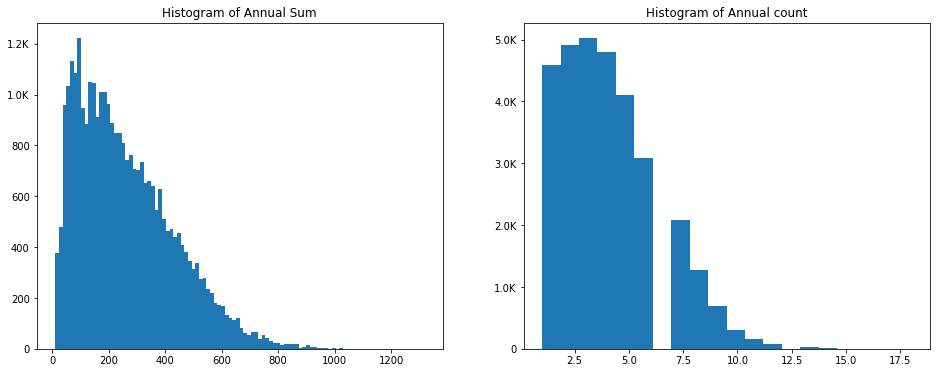

In [0]:
fig, ax = plt.subplots(ncols=2,figsize=(16,6))
hist(ax[0], clnt_annual_aggregations.select('ann_txn_amt_sum'),bins = 100)
ax[0].set_title("Histogram of Annual Sum")
hist(ax[1], clnt_annual_aggregations.select('ann_txn_amt_cnt'),bins = 20)
ax[1].set_title("Histogram of Annual count")
plt.show()

#### 1.2.3

In [0]:
clnt_annual_aggregations_pivot = clnt_annual_aggregations.groupBy('customer_id').pivot('YEAR').agg(first(col("ann_txn_amt_sum")).alias("ann_txn_amt_sum"),
                                                                  first(col("ann_txn_amt_ave")).alias("ann_txn_amt_ave"),
                                                                  first(col("ann_txn_amt_std")).alias("ann_txn_amt_std"),
                                                                  first(col("ann_txn_amt_var")).alias("ann_txn_amt_var"),
                                                                  first(col("ann_txn_amt_sem")).alias("ann_txn_amt_sem"),
                                                                  first(col("ann_txn_amt_max")).alias("ann_txn_amt_max"),
                                                                  first(col("ann_txn_amt_min")).alias("ann_txn_amt_min"),
                                                                  first(col("ann_txn_amt_cnt")).alias("ann_txn_amt_cnt"))                                                                                   
clnt_annual_aggregations_pivot = clnt_annual_aggregations_pivot.na.fill(value=0)
display(clnt_annual_aggregations_pivot)

customer_id 2011_ann_txn_amt_sum 2011_ann_txn_amt_ave 2011_ann_txn_amt_std 2011_ann_txn_amt_var 2011_ann_txn_amt_sem 2011_ann_txn_amt_max 2011_ann_txn_amt_min 2011_ann_txn_amt_cnt 2012_ann_txn_amt_sum 2012_ann_txn_amt_ave 2012_ann_txn_amt_std 2012_ann_txn_amt_var 2012_ann_txn_amt_sem 2012_ann_txn_amt_max 2012_ann_txn_amt_min 2012_ann_txn_amt_cnt 2013_ann_txn_amt_sum 2013_ann_txn_amt_ave 2013_ann_txn_amt_std 2013_ann_txn_amt_var 2013_ann_txn_amt_sem 2013_ann_txn_amt_max 2013_ann_txn_amt_min 2013_ann_txn_amt_cnt 2014_ann_txn_amt_sum 2014_ann_txn_amt_ave 2014_ann_txn_amt_std 2014_ann_txn_amt_var 2014_ann_txn_amt_sem 2014_ann_txn_amt_max 2014_ann_txn_amt_min 2014_ann_txn_amt_cnt 2015_ann_txn_amt_sum 2015_ann_txn_amt_ave 2015_ann_txn_amt_std 2015_ann_txn_amt_var 2015_ann_txn_amt_sem 2015_ann_txn_amt_max 2015_ann_txn_amt_min 2015_ann_txn_amt_cnt CS1112 212.0 70.66666666666667 22.03028218914441 485.33333333333337 12.719189352225943 96 56 3 337.0 67.4 12.720062892926277 161.8 5.688585061331157 81 52 5 212.0 70.66666666666667 34.50120770833006 1190.3333333333333 19.91928155777155 71 105 3 212.0 70.66666666666667 16.862186493255653 284.33333333333337 9.735387911006823 90 59 3 39.0 39.0 0.0 0.0 0.0 39 39 1 CS1113 244.0 81.33333333333333 21.07921567168317 444.33333333333337 12.170090842352456 94 57 3 374.0 74.8 17.035257556021865 290.20000000000005 7.618398781896364 95 51 5 426.0 85.2 13.0843417870369 171.2 5.851495535331117 97 65 5 226.0 56.5 27.958302285129307 781.6666666666666 13.979151142564653 97 36 4 220.0 73.33333333333333 27.300793639257694 745.3333333333334 15.762120556715853 98 44 3 CS1114 426.0 85.2 9.731392500562293 94.70000000000003 4.352011029397789 97 76 5 150.0 75.0 31.11269837220809 968.0 21.999999999999996 97 53 2 352.0 70.4 24.88573888796553 619.3 11.129240764760189 84 105 5 425.0 70.83333333333333 26.947479783212874 726.1666666666666 11.001262553806166 95 37 6 79.0 79.0 0.0 0.0 0.0 79 79 1 CS1115 261.0 87.0 15.0 225.0 8.660254037844387 87 102 3 473.0 67.57142857142857 21.846869667888676 477.2857142857143 8.257340580924813 88 104 7 557.0 79.57142857142857 10.533393610436333 110.95238095238098 3.9812485649673297 94 66 7 313.0 78.25 22.632940595512547 512.2499999999999 11.316470297756274 98 50 4 55.0 55.0 0.0 0.0 0.0 55 55 1 CS1116 235.0 58.75 21.203380233664003 449.5833333333333 10.601690116832001 87 41 4 230.0 76.66666666666667 30.138568866708543 908.3333333333334 17.400510848184254 80 105 3 59.0 59.0 0.0 0.0 0.0 59 59 1 333.0 66.6 25.234896472940004 636.8 11.285388783732706 96 40 5 0.0 0.0 0.0 0.0 0.0 null null 0 CS1117 213.0 71.0 26.057628441590765 679.0 15.044378795195678 98 46 3 196.0 65.33333333333333 32.715949219506584 1070.3333333333335 18.888562088676252 61 100 3 347.0 69.4 17.38677658451963 302.30000000000007 7.775602870517502 94 49 5 429.0 71.5 15.871357849913158 251.9 6.47945470956726 94 56 6 0.0 0.0 0.0 0.0 0.0 null null 0 CS1118 124.0 62.0 26.870057685088806 722.0 19.0 81 43 2 63.0 63.0 0.0 0.0 0.0 63 63 1 144.0 72.0 7.0710678118654755 50.0 5.0 77 67 2 620.0 68.88888888888889 23.5661008890124 555.3611111111111 7.855366963004133 98 101 9 60.0 60.0 0.0 0.0 0.0 60 60 1 CS1119 0.0 0.0 0.0 0.0 0.0 null null 0 411.0 82.2 27.30750812505601 745.7 12.212288892750612 87 100 5 239.0 79.66666666666667 26.85764943797825 721.3333333333334 15.506271132817345 99 49 3 449.0 74.83333333333333 21.5445275340785 464.16666666666663 8.795516534639175 93 36 6 59.0 59.0 0.0 0.0 0.0 59 59 1 CS1120 410.0 82.0 22.561028345356956 509.0 10.08959860450355 86 101 5 352.0 70.4 19.37266114915553 375.3 8.663717446916191 96 50 5 508.0 72.57142857142857 23.387013083170345 546.9523809523808 8.839460075240382 98 100 7 75.0 75.0 0.0 0.0 0.0 75 75 1 332.0 55.333333333333336 15.819818793736758 250.2666666666667 6.458413977991124 84 41 6 CS1121 288.0 72.0 32.03123475609393 1026.0 16.015617378046965 97 102 4 613.0 61.3 22.652201266592662 513.1222222222223 7.163255001898384 86 104 10 283.0 56.6 20.971409108593537 439.8 9.378699270154684 88 38 5 303.0 

* Due to the fact that there are 8 aggregated features in total. There are 5 years of data for each feature. Hence, there are 40 columns (8 * 5). As the custormer has no transcations, I filled in the NaN values with 0.

#### 1.2.4

In [0]:
print(clnt_annual_aggregations_pivot.columns)
print(len(clnt_annual_aggregations_pivot.columns))

['customer_id', '2011_ann_txn_amt_sum', '2011_ann_txn_amt_ave', '2011_ann_txn_amt_std', '2011_ann_txn_amt_var', '2011_ann_txn_amt_sem', '2011_ann_txn_amt_max', '2011_ann_txn_amt_min', '2011_ann_txn_amt_cnt', '2012_ann_txn_amt_sum', '2012_ann_txn_amt_ave', '2012_ann_txn_amt_std', '2012_ann_txn_amt_var', '2012_ann_txn_amt_sem', '2012_ann_txn_amt_max', '2012_ann_txn_amt_min', '2012_ann_txn_amt_cnt', '2013_ann_txn_amt_sum', '2013_ann_txn_amt_ave', '2013_ann_txn_amt_std', '2013_ann_txn_amt_var', '2013_ann_txn_amt_sem', '2013_ann_txn_amt_max', '2013_ann_txn_amt_min', '2013_ann_txn_amt_cnt', '2014_ann_txn_amt_sum', '2014_ann_txn_amt_ave', '2014_ann_txn_amt_std', '2014_ann_txn_amt_var', '2014_ann_txn_amt_sem', '2014_ann_txn_amt_max', '2014_ann_txn_amt_min', '2014_ann_txn_amt_cnt', '2015_ann_txn_amt_sum', '2015_ann_txn_amt_ave', '2015_ann_txn_amt_std', '2015_ann_txn_amt_var', '2015_ann_txn_amt_sem', '2015_ann_txn_amt_max', '2015_ann_txn_amt_min', '2015_ann_txn_amt_cnt']
41


* The dataframe clnt annual aggregations pivot is single indexed since using PySpark. Hence, there are 41 columns in total, including "customer id," and there is only one level of columns here. The column names are printed above.

#### 1.2.5

In [0]:
annual_features = clnt_annual_aggregations_pivot
display(annual_features) #downloaded as csv directly

customer_id 2011_ann_txn_amt_sum 2011_ann_txn_amt_ave 2011_ann_txn_amt_std 2011_ann_txn_amt_var 2011_ann_txn_amt_sem 2011_ann_txn_amt_max 2011_ann_txn_amt_min 2011_ann_txn_amt_cnt 2012_ann_txn_amt_sum 2012_ann_txn_amt_ave 2012_ann_txn_amt_std 2012_ann_txn_amt_var 2012_ann_txn_amt_sem 2012_ann_txn_amt_max 2012_ann_txn_amt_min 2012_ann_txn_amt_cnt 2013_ann_txn_amt_sum 2013_ann_txn_amt_ave 2013_ann_txn_amt_std 2013_ann_txn_amt_var 2013_ann_txn_amt_sem 2013_ann_txn_amt_max 2013_ann_txn_amt_min 2013_ann_txn_amt_cnt 2014_ann_txn_amt_sum 2014_ann_txn_amt_ave 2014_ann_txn_amt_std 2014_ann_txn_amt_var 2014_ann_txn_amt_sem 2014_ann_txn_amt_max 2014_ann_txn_amt_min 2014_ann_txn_amt_cnt 2015_ann_txn_amt_sum 2015_ann_txn_amt_ave 2015_ann_txn_amt_std 2015_ann_txn_amt_var 2015_ann_txn_amt_sem 2015_ann_txn_amt_max 2015_ann_txn_amt_min 2015_ann_txn_amt_cnt CS1112 212.0 70.66666666666667 22.03028218914441 485.33333333333337 12.719189352225943 96 56 3 337.0 67.4 12.720062892926277 161.8 5.688585061331157 81 52 5 212.0 70.66666666666667 34.50120770833006 1190.3333333333333 19.91928155777155 71 105 3 212.0 70.66666666666667 16.862186493255653 284.33333333333337 9.735387911006823 90 59 3 39.0 39.0 0.0 0.0 0.0 39 39 1 CS1113 244.0 81.33333333333333 21.07921567168317 444.33333333333337 12.170090842352456 94 57 3 374.0 74.8 17.035257556021865 290.20000000000005 7.618398781896364 95 51 5 426.0 85.2 13.0843417870369 171.2 5.851495535331117 97 65 5 226.0 56.5 27.958302285129307 781.6666666666666 13.979151142564653 97 36 4 220.0 73.33333333333333 27.300793639257694 745.3333333333334 15.762120556715853 98 44 3 CS1114 426.0 85.2 9.731392500562293 94.70000000000003 4.352011029397789 97 76 5 150.0 75.0 31.11269837220809 968.0 21.999999999999996 97 53 2 352.0 70.4 24.88573888796553 619.3 11.129240764760189 84 105 5 425.0 70.83333333333333 26.947479783212874 726.1666666666666 11.001262553806166 95 37 6 79.0 79.0 0.0 0.0 0.0 79 79 1 CS1115 261.0 87.0 15.0 225.0 8.660254037844387 87 102 3 473.0 67.57142857142857 21.846869667888676 477.2857142857143 8.257340580924813 88 104 7 557.0 79.57142857142857 10.533393610436333 110.95238095238098 3.9812485649673297 94 66 7 313.0 78.25 22.632940595512547 512.2499999999999 11.316470297756274 98 50 4 55.0 55.0 0.0 0.0 0.0 55 55 1 CS1116 235.0 58.75 21.203380233664003 449.5833333333333 10.601690116832001 87 41 4 230.0 76.66666666666667 30.138568866708543 908.3333333333334 17.400510848184254 80 105 3 59.0 59.0 0.0 0.0 0.0 59 59 1 333.0 66.6 25.234896472940004 636.8 11.285388783732706 96 40 5 0.0 0.0 0.0 0.0 0.0 null null 0 CS1117 213.0 71.0 26.057628441590765 679.0 15.044378795195678 98 46 3 196.0 65.33333333333333 32.715949219506584 1070.3333333333335 18.888562088676252 61 100 3 347.0 69.4 17.38677658451963 302.30000000000007 7.775602870517502 94 49 5 429.0 71.5 15.871357849913158 251.9 6.47945470956726 94 56 6 0.0 0.0 0.0 0.0 0.0 null null 0 CS1118 124.0 62.0 26.870057685088806 722.0 19.0 81 43 2 63.0 63.0 0.0 0.0 0.0 63 63 1 144.0 72.0 7.0710678118654755 50.0 5.0 77 67 2 620.0 68.88888888888889 23.5661008890124 555.3611111111111 7.855366963004133 98 101 9 60.0 60.0 0.0 0.0 0.0 60 60 1 CS1119 0.0 0.0 0.0 0.0 0.0 null null 0 411.0 82.2 27.30750812505601 745.7 12.212288892750612 87 100 5 239.0 79.66666666666667 26.85764943797825 721.3333333333334 15.506271132817345 99 49 3 449.0 74.83333333333333 21.5445275340785 464.16666666666663 8.795516534639175 93 36 6 59.0 59.0 0.0 0.0 0.0 59 59 1 CS1120 410.0 82.0 22.561028345356956 509.0 10.08959860450355 86 101 5 352.0 70.4 19.37266114915553 375.3 8.663717446916191 96 50 5 508.0 72.57142857142857 23.387013083170345 546.9523809523808 8.839460075240382 98 100 7 75.0 75.0 0.0 0.0 0.0 75 75 1 332.0 55.333333333333336 15.819818793736758 250.2666666666667 6.458413977991124 84 41 6 CS1121 288.0 72.0 32.03123475609393 1026.0 16.015617378046965 97 102 4 613.0 61.3 22.652201266592662 513.1222222222223 7.163255001898384 86 104 10 283.0 56.6 20.971409108593537 439.8 9.378699270154684 88 38 5 303.0 

#### 1.2.6: 
##### What are the possible disadvantages in capturing client transaction behavior with the annual features described in this section (if any)?   
* Data on annual transactions is too broad. It can be challenging to identify some subtle selling patterns, such as how frequently a consumer visited the store.

### 1.3 Create monthly aggregations

#### 1.3.1

In [0]:
clnt_monthly_aggregations = txn.groupBy(['customer_id','ME_DT']).agg(sum('tran_amount').alias("mth_txn_amt_sum"),
                                                                     count('tran_amount').alias("mth_txn_cnt"))
display(clnt_monthly_aggregations)

customer_id ME_DT mth_txn_amt_sum mth_txn_cnt CS2724 2012-02-29 93.0 1 CS5201 2011-07-31 152.0 2 CS4681 2014-02-28 96.0 1 CS3182 2013-01-31 148.0 2 CS1492 2011-09-30 101.0 1 CS2699 2013-11-30 64.0 1 CS3758 2014-04-30 55.0 1 CS5181 2012-04-30 96.0 1 CS5185 2011-05-31 56.0 1 CS4278 2013-08-31 99.0 2 CS2434 2012-09-30 75.0 1 CS3457 2011-09-30 74.0 1 CS4203 2012-02-29 84.0 1 CS5220 2013-07-31 94.0 1 CS3494 2013-09-30 221.0 3 CS3786 2013-01-31 77.0 2 CS3959 2012-12-31 212.0 3 CS1258 2011-06-30 95.0 1 CS3540 2013-03-31 67.0 1 CS3258 2011-11-30 42.0 1 CS1862 2014-05-31 101.0 1 CS2432 2014-09-30 91.0 1 CS6017 2013-05-31 56.0 1 CS1347 2011-11-30 40.0 1 CS4890 2014-06-30 136.0 2 CS1503 2012-04-30 224.0 3 CS5424 2012-06-30 98.0 1 CS3561 2013-04-30 187.0 2 CS4870 2011-07-31 204.0 3 CS2036 2012-07-31 63.0 1 CS3796 2011-09-30 129.0 2 CS2336 2015-02-28 256.0 3 CS2470 2013-06-30 80.0 1 CS5028 2014-08-31 82.0 1 CS1597 2011-07-31 181.0 3 CS5082 2013-12-31 46.0 1 CS1410 2014-02-28 88.0 1 CS3638 2013-07-31 58.0 1 CS4839 2013-08-31 202.0 3 CS3106 2014-01-31 71.0 1 CS2443 2014-05-31 94.0 1 CS1285 2013-12-31 155.0 2 CS2353 2013-12-31 74.0 1 CS3177 2014-09-30 82.0 1 CS3069 2012-08-31 75.0 1 CS5649 2014-12-31 39.0 1 CS5461 2014-11-30 104.0 1 CS5919 2011-09-30 43.0 1 CS1644 2014-07-31 137.0 2 CS2794 2013-02-28 175.0 2 CS4730 2014-12-31 58.0 1 CS5776 2013-03-31 86.0 1 CS2020 2013-03-31 67.0 1 CS6002 2014-03-31 233.0 3 CS5497 2014-03-31 175.0 2 CS1630 2012-12-31 89.0 1 CS3971 2012-11-30 51.0 1 CS5525 2012-06-30 95.0 1 CS3257 2012-07-31 52.0 1 CS2413 2011-06-30 47.0 1 CS1934 2011-08-31 69.0 1 CS3334 2015-02-28 144.0 2 CS1120 2011-09-30 151.0 2 CS2189 2012-12-31 64.0 1 CS5498 2014-01-31 140.0 2 CS3871 2013-03-31 38.0 1 CS2920 2014-02-28 175.0 2 CS2774 2014-11-30 85.0 1 CS4031 2014-05-31 79.0 1 CS4580 2012-02-29 42.0 1 CS4786 2011-08-31 151.0 2 CS4974 2014-06-30 103.0 2 CS1385 2015-02-28 104.0 1 CS3845 2011-10-31 43.0 1 CS1218 2011-10-31 66.0 1 CS2006 2014-10-31 103.0 1 CS5343 2014-11-30 67.0 1 CS5614 2011-05-31 61.0 1 CS3933 2014-11-30 75.0 1 CS4019 2013-01-31 51.0 1 CS5863 2013-04-30 46.0 1 CS3730 2014-03-31 198.0 3 CS5484 2012-06-30 116.0 2 CS4971 2012-09-30 103.0 1 CS2508 2012-11-30 147.0 2 CS1631 2011-11-30 167.0 2 CS4955 2014-07-31 153.0 2 CS3132 2014-11-30 94.0 1 CS2632 2012-07-31 102.0 1 CS3241 2014-08-31 75.0 1 CS4877 2014-11-30 46.0 1 CS5950 2011-10-31 168.0 2 CS3576 2014-10-31 57.0 1 CS1796 2014-03-31 61.0 1 CS1833 2012-12-31 59.0 1 CS3685 2013-12-31 182.0 2 CS1560 2011-09-30 56.0 1 CS2894 2014-03-31 145.0 2 CS1230 2012-02-29 54.0 1 CS3145 2014-10-31 58.0 1 CS3883 2013-02-28 57.0 1 CS5310 2012-03-31 42.0 1 CS3304 2013-11-30 156.0 2 CS5979 2013-04-30 54.0 1 CS5880 2014-02-28 78.0 1 CS3918 2013-10-31 96.0 1 CS4510 2012-10-31 138.0 2 CS5367 2012-01-31 187.0 2 CS1593 2012-01-31 75.0 1 CS2959 2014-09-30 77.0 1 CS1705 2013-07-31 86.0 1 CS4440 2012-11-30 66.0 1 CS1537 2011-09-30 177.0 3 CS3283 2012-08-31 80.0 1 CS3773 2011-09-30 96.0 1 CS4104 2011-06-30 206.0 2 CS3794 2011-07-31 73.0 1 CS2313 2012-06-30 49.0 1 CS4118 2012-12-31 86.0 1 CS3529 2011-10-31 156.0 2 CS2488 2013-02-28 130.0 2 CS2216 2014-01-31 162.0 2 CS3652 2012-08-31 114.0 2 CS1199 2012-09-30 150.0 2 CS2392 2014-10-31 105.0 1 CS3360 2013-08-31 124.0 2 CS3276 2013-01-31 54.0 1 CS1317 2013-05-31 87.0 1 CS5388 2013-12-31 143.0 2 CS4268 2012-03-31 63.0 1 CS4413 2012-10-31 118.0 2 CS2824 2012-07-31 104.0 2 CS2369 2012-09-30 80.0 1 CS1302 2011-05-31 102.0 1 CS3754 2012-11-30 130.0 2 CS2093 2013-07-31 91.0 1 CS5015 2014-09-30 63.0 1 CS5742 2013-03-31 184.0 2 CS4246 2014-03-31 142.0 2 CS3856 2011-07-31 53.0 1 CS2171 2014-08-31 70.0 1 CS3977 2014-05-31 102.0 1 CS1348 2014-03-31 96.0 1 CS4642 2014-06-30 101.0 2 CS3369 2012-04-30 39.0 1 CS4253 2012-12-31 41.0 1 CS3012 2011-12-31 92.0 1 CS5107 2012-01-31 41.0 1 CS5534 2012-09-30 58.0 1 CS3877 2013-06-30 143.0 2 CS1115 2014-01-31 70.0 1 CS4594 2013-11-30 91.0 1 CS5570 2014-08-31 58.0 1 CS4344 2013-01-31 68.0 1 CS3488 2014-11-30 37.0 1 CS3758 2011-08-31 5

#### 1.3.2

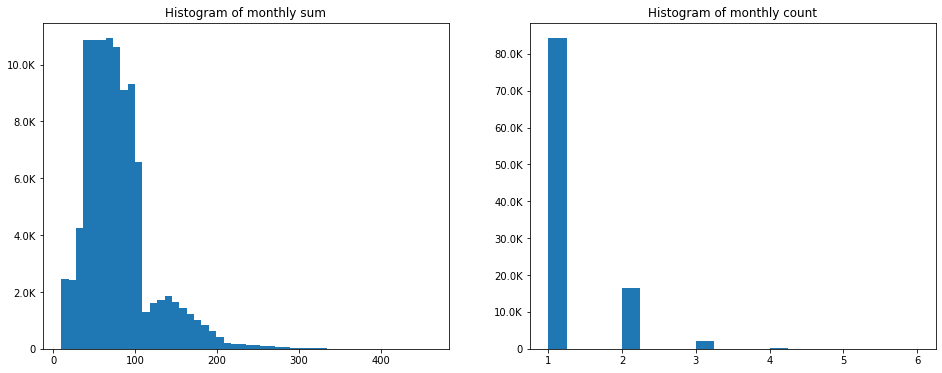

In [0]:
fig, ax = plt.subplots(ncols=2,figsize=(16,6))
hist(ax[0], clnt_monthly_aggregations.select('mth_txn_amt_sum'),bins = 50)
ax[0].set_title("Histogram of monthly sum")
hist(ax[1], clnt_monthly_aggregations.select('mth_txn_cnt'),bins = 20)
ax[1].set_title("Histogram of monthly count")
plt.show()

In [0]:
print('The Most Common Value for Monthly Sum is', clnt_monthly_aggregations.groupby("mth_txn_amt_sum").count().orderBy("count", ascending=False).first()[0])
print('The Most Common Value for Monthly Count is', clnt_monthly_aggregations.groupby("mth_txn_cnt").count().orderBy("count", ascending=False).first()[0])
clnt_monthly_aggregations.select(max("mth_txn_amt_sum")).show()
clnt_monthly_aggregations.select(max("mth_txn_cnt")).show()

The Most Common Value for Monthly Sum is 77.0
The Most Common Value for Monthly Count is 1
+--------------------+
|max(mth_txn_amt_sum)|
+--------------------+
|               460.0|
+--------------------+

+----------------+
|max(mth_txn_cnt)|
+----------------+
|               6|
+----------------+



* According to the histograms and data, the monthly transactions sum's most frequent value is 77.0, while the count's most frequent number is 1. Most people visit the business once a month, and they typically do not spend more than $100. The maximum total and count are 460 and 6, respectively.
* The histograms are right-skewed in comparison to the histograms of annual transactions in figure 1.2. The annual spending was in the range of $0-$400, and the monthly expenditures were between $0-$100. However, the majority of individuals only visit the business five times a year or no more than once each month.

### 1.4 Create the base table for the rolling window features

#### 1.4.1

In [0]:
clnt_no = np.array(txn.select(['customer_id']).distinct().collect())
me_dt = np.array(txn.select('ME_DT').distinct().collect())
print('The number of unique clients is', len(clnt_no))
print('The number of unique month-end-dates is', len(me_dt))

The number of unique clients is 6889
The number of unique month-end-dates is 47


#### 1.4.2

In [0]:
base_table = itertools.product(clnt_no,me_dt)
type(base_table)

Out[15]: itertools.product

#### 1.4.3

In [0]:
base_table_pd = pd.DataFrame.from_records(base_table)
base_table_pd.columns = ['CLNT_NO', 'ME_DT']
base_table_pd

CLNT_NO 
 ME_DT 
 
 
 
 
 0 
 [CS6001] 
 [2012-05-31] 
 
 
 1 
 [CS6001] 
 [2013-03-31] 
 
 
 2 
 [CS6001] 
 [2012-08-31] 
 
 
 3 
 [CS6001] 
 [2012-01-31] 
 
 
 4 
 [CS6001] 
 [2014-02-28] 
 
 
 ... 
 ... 
 ... 
 
 
 323778 
 [CS8076] 
 [2014-08-31] 
 
 
 323779 
 [CS8076] 
 [2012-10-31] 
 
 
 323780 
 [CS8076] 
 [2012-12-31] 
 
 
 323781 
 [CS8076] 
 [2012-03-31] 
 
 
 323782 
 [CS8076] 
 [2015-01-31] 
 
 
 
 323783 rows × 2 columns

#### 1.4.4

In [0]:
CS1112 = base_table_pd[base_table_pd['CLNT_NO'] == 'CS1112']
spark = SparkSession.builder \
    .master("local[1]") \
    .appName("SparkByExamples.com") \
    .getOrCreate()

CS1112=spark.createDataFrame(CS1112) 
CS1112.printSchema()
CS1112.show()

root
 |-- CLNT_NO: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- ME_DT: array (nullable = true)
 |    |-- element: date (containsNull = true)

+--------+------------+
| CLNT_NO|       ME_DT|
+--------+------------+
|[CS1112]|[2012-05-31]|
|[CS1112]|[2013-03-31]|
|[CS1112]|[2012-08-31]|
|[CS1112]|[2012-01-31]|
|[CS1112]|[2014-02-28]|
|[CS1112]|[2013-05-31]|
|[CS1112]|[2011-07-31]|
|[CS1112]|[2011-12-31]|
|[CS1112]|[2013-02-28]|
|[CS1112]|[2011-09-30]|
|[CS1112]|[2013-12-31]|
|[CS1112]|[2013-04-30]|
|[CS1112]|[2012-09-30]|
|[CS1112]|[2014-06-30]|
|[CS1112]|[2012-04-30]|
|[CS1112]|[2014-05-31]|
|[CS1112]|[2015-02-28]|
|[CS1112]|[2014-11-30]|
|[CS1112]|[2011-05-31]|
|[CS1112]|[2013-10-31]|
+--------+------------+
only showing top 20 rows



In [0]:
txn.select(min('txn_date'),max('txn_date')).show()
CS1112.select(min('ME_DT'),max('ME_DT')).show()

+-------------+-------------+
|min(txn_date)|max(txn_date)|
+-------------+-------------+
|   2011-05-16|   2015-03-16|
+-------------+-------------+

+------------+------------+
|  min(ME_DT)|  max(ME_DT)|
+------------+------------+
|[2011-05-31]|[2015-03-31]|
+------------+------------+



* From 1.1, we have min date: 2011-05-16, max date: 2015-03-16.   
* From Client CS1112, we have min date: 2011-05-31, max date: 2015-03-31.  
* Therefore, dates of client CS1112 fall between the min and max month-dates.

In [0]:
print('The number of rows of CS1112 is', CS1112.count())
print('The number of rows of base_table_pd is', base_table_pd.shape[0])

The number of rows of CS1112 is 47
The number of rows of base_table_pd is 323783


### 1.5 Create the monthly rolling window features

#### 1.5.1

In [0]:
spark = SparkSession.builder \
    .master("local[1]") \
    .appName("SparkByExamples.com") \
    .getOrCreate()
base_table_pd=spark.createDataFrame(base_table_pd) 
base_table_pd = base_table_pd.withColumn("CLNT_NO",
   concat_ws(",",col("CLNT_NO")))
base_table_pd = base_table_pd.withColumn("ME_DT",
   concat_ws(",",col("ME_DT")))
base_table_pd.printSchema()
base_table_pd.show()

root
 |-- CLNT_NO: string (nullable = false)
 |-- ME_DT: string (nullable = false)

+-------+----------+
|CLNT_NO|     ME_DT|
+-------+----------+
| CS6001|2012-05-31|
| CS6001|2013-03-31|
| CS6001|2012-08-31|
| CS6001|2012-01-31|
| CS6001|2014-02-28|
| CS6001|2013-05-31|
| CS6001|2011-07-31|
| CS6001|2011-12-31|
| CS6001|2013-02-28|
| CS6001|2011-09-30|
| CS6001|2013-12-31|
| CS6001|2013-04-30|
| CS6001|2012-09-30|
| CS6001|2014-06-30|
| CS6001|2012-04-30|
| CS6001|2014-05-31|
| CS6001|2015-02-28|
| CS6001|2014-11-30|
| CS6001|2011-05-31|
| CS6001|2013-10-31|
+-------+----------+
only showing top 20 rows



In [0]:
clnt_monthly_aggregations = clnt_monthly_aggregations.withColumnRenamed("ME_DT","Month")
join_cond = [clnt_monthly_aggregations["customer_id"]==base_table_pd["CLNT_NO"],clnt_monthly_aggregations["Month"]==base_table_pd["ME_DT"]]
base_clnt_mth = base_table_pd.join(clnt_monthly_aggregations,join_cond,"left")
base_clnt_mth = base_clnt_mth.drop("customer_id","Month")
display(base_clnt_mth)

CLNT_NO ME_DT mth_txn_amt_sum mth_txn_cnt CS6001 2012-05-31 null null CS6001 2013-03-31 null null CS6001 2012-08-31 65.0 1 CS6001 2012-01-31 null null CS6001 2014-02-28 63.0 1 CS6001 2013-05-31 null null CS6001 2011-07-31 null null CS6001 2011-12-31 null null CS6001 2013-02-28 null null CS6001 2011-09-30 null null CS6001 2013-12-31 null null CS6001 2013-04-30 null null CS6001 2012-09-30 null null CS6001 2014-06-30 117.0 2 CS6001 2012-04-30 null null CS6001 2014-05-31 200.0 3 CS6001 2015-02-28 null null CS6001 2014-11-30 null null CS6001 2011-05-31 null null CS6001 2013-10-31 null null CS6001 2012-02-29 null null CS6001 2011-11-30 null null CS6001 2013-08-31 null null CS6001 2014-12-31 null null CS6001 2012-11-30 null null CS6001 2014-07-31 null null CS6001 2013-01-31 44.0 1 CS6001 2012-06-30 null null CS6001 2014-04-30 null null CS6001 2014-01-31 56.0 1 CS6001 2013-06-30 39.0 1 CS6001 2013-11-30 null null CS6001 2014-10-31 null null CS6001 2012-07-31 103.0 1 CS6001 2011-10-31 null null CS6001 2011-08-31 null null CS6001 2011-06-30 84.0 1 CS6001 2013-09-30 null null CS6001 2013-07-31 null null CS6001 2015-03-31 null null CS6001 2014-03-31 204.0 3 CS6001 2014-09-30 null null CS6001 2014-08-31 87.0 1 CS6001 2012-10-31 260.0 3 CS6001 2012-12-31 null null CS6001 2012-03-31 null null CS6001 2015-01-31 null null CS3128 2012-05-31 null null CS3128 2013-03-31 null null CS3128 2012-08-31 null null CS3128 2012-01-31 null null CS3128 2014-02-28 null null CS3128 2013-05-31 null null CS3128 2011-07-31 null null CS3128 2011-12-31 null null CS3128 2013-02-28 115.0 2 CS3128 2011-09-30 91.0 1 CS3128 2013-12-31 67.0 1 CS3128 2013-04-30 null null CS3128 2012-09-30 null null CS3128 2014-06-30 null null CS3128 2012-04-30 null null CS3128 2014-05-31 47.0 1 CS3128 2015-02-28 null null CS3128 2014-11-30 123.0 2 CS3128 2011-05-31 79.0 1 CS3128 2013-10-31 99.0 2 CS3128 2012-02-29 100.0 1 CS3128 2011-11-30 null null CS3128 2013-08-31 160.0 2 CS3128 2014-12-31 65.0 1 CS3128 2012-11-30 54.0 1 CS3128 2014-07-31 98.0 2 CS3128 2013-01-31 null null CS3128 2012-06-30 80.0 1 CS3128 2014-04-30 null null CS3128 2014-01-31 null null CS3128 2013-06-30 null null CS3128 2013-11-30 38.0 1 CS3128 2014-10-31 54.0 1 CS3128 2012-07-31 null null CS3128 2011-10-31 null null CS3128 2011-08-31 null null CS3128 2011-06-30 null null CS3128 2013-09-30 null null CS3128 2013-07-31 74.0 1 CS3128 2015-03-31 null null CS3128 2014-03-31 null null CS3128 2014-09-30 91.0 1 CS3128 2014-08-31 null null CS3128 2012-10-31 37.0 1 CS3128 2012-12-31 null null CS3128 2012-03-31 null null CS3128 2015-01-31 null null CS5241 2012-05-31 37.0 1 CS5241 2013-03-31 37.0 1 CS5241 2012-08-31 null null CS5241 2012-01-31 54.0 1 CS5241 2014-02-28 72.0 1 CS5241 2013-05-31 104.0 2 CS5241 2011-07-31 null null CS5241 2011-12-31 200.0 3 CS5241 2013-02-28 38.0 1 CS5241 2011-09-30 89.0 1 CS5241 2013-12-31 null null CS5241 2013-04-30 null null CS5241 2012-09-30 null null CS5241 2014-06-30 null null CS5241 2012-04-30 null null CS5241 2014-05-31 null null CS5241 2015-02-28 null null CS5241 2014-11-30 null null CS5241 2011-05-31 null null CS5241 2013-10-31 null null CS5241 2012-02-29 null null CS5241 2011-11-30 null null CS5241 2013-08-31 59.0 1 CS5241 2014-12-31 null null CS5241 2012-11-30 null null CS5241 2014-07-31 null null CS5241 2013-01-31 null null CS5241 2012-06-30 null null CS5241 2014-04-30 80.0 1 CS5241 2014-01-31 null null CS5241 2013-06-30 null null CS5241 2013-11-30 null null CS5241 2014-10-31 null null CS5241 2012-07-31 null null CS5241 2011-10-31 85.0 1 CS5241 2011-08-31 null null CS5241 2011-06-30 null null CS5241 2013-09-30 null null CS5241 2013-07-31 55.0 1 CS5241 2015-03-31 93.0 1 CS5241 2014-03-31 94.0 1 CS5241 2014-09-30 37.0 1 CS5241 2014-08-31 null null CS5241 2012-10-31 83.0 1 CS5241 2012-12-31 null null CS5241 2012-03-31 null null CS5241 2015-01-31 null null CS3155 2012-05-31 82.0 1 CS3155 2013-03-31 196.0 3 CS3155 2012-08-31 null null CS3155 2012-01-31 90.0 1 CS3155 2014-02-28 null null CS315

In [0]:
print("The number of rows of base_table_pd is",base_table_pd.count())
print("The number of rows of clnt_monthly_aggregations is",clnt_monthly_aggregations.count())

The number of rows of base_table_pd is 323783
The number of rows of clnt_monthly_aggregations is 103234


In [0]:
base_clnt_mth = base_clnt_mth.na.fill(value=0)

##### Why do some rows have NaN values?  
* While clnt monthly aggregations only has 103234 rows, base table pd has 323783 rows. Hence, some entries in the clnt monthly aggregations table will have NaN values when there are no records matching in the base table pd.

##### What values will you choose to impute NaN values in the sum and count columns? Perform the imputation you suggest.  
* As NaN values signify that the consumer had no transactions during that month, I will fill them with zero. The transaction sum and count are therefore both 0.

In [0]:
print("The number of rows is",base_clnt_mth.count())

The number of rows is 323783


##### Confirm that the number of rows is what you expect. What is the value?  
* There are 323783 rows, which is exactly what I anticipated. There are exactly the same amount of rows here as there are in base table pd.
##### How are tables base_clnt_mth and clnt_monthly_aggregations different? Comment on the number of rows and the content of each table.  
* clnt monthly aggregations has 103234 rows, all of which are records of transactions with consumers. Whereas base clnt mth has 323783 rows total, including all possible client and month combinations. Moreover, base clnt mth includes all records, transactional and non-transactional.

#### 1.5.2

In [0]:
base_clnt_mth = base_clnt_mth.sort(col("CLNT_NO").asc(),col("ME_DT").asc())
display(base_clnt_mth)

CLNT_NO ME_DT mth_txn_amt_sum mth_txn_cnt CS1112 2011-05-31 0.0 0 CS1112 2011-06-30 56.0 1 CS1112 2011-07-31 0.0 0 CS1112 2011-08-31 96.0 1 CS1112 2011-09-30 0.0 0 CS1112 2011-10-31 60.0 1 CS1112 2011-11-30 0.0 0 CS1112 2011-12-31 0.0 0 CS1112 2012-01-31 0.0 0 CS1112 2012-02-29 0.0 0 CS1112 2012-03-31 0.0 0 CS1112 2012-04-30 56.0 1 CS1112 2012-05-31 0.0 0 CS1112 2012-06-30 52.0 1 CS1112 2012-07-31 81.0 1 CS1112 2012-08-31 0.0 0 CS1112 2012-09-30 72.0 1 CS1112 2012-10-31 0.0 0 CS1112 2012-11-30 0.0 0 CS1112 2012-12-31 76.0 1 CS1112 2013-01-31 0.0 0 CS1112 2013-02-28 0.0 0 CS1112 2013-03-31 105.0 1 CS1112 2013-04-30 0.0 0 CS1112 2013-05-31 0.0 0 CS1112 2013-06-30 0.0 0 CS1112 2013-07-31 36.0 1 CS1112 2013-08-31 0.0 0 CS1112 2013-09-30 0.0 0 CS1112 2013-10-31 0.0 0 CS1112 2013-11-30 71.0 1 CS1112 2013-12-31 0.0 0 CS1112 2014-01-31 0.0 0 CS1112 2014-02-28 0.0 0 CS1112 2014-03-31 0.0 0 CS1112 2014-04-30 63.0 1 CS1112 2014-05-31 0.0 0 CS1112 2014-06-30 0.0 0 CS1112 2014-07-31 90.0 1 CS1112 2014-08-31 0.0 0 CS1112 2014-09-30 0.0 0 CS1112 2014-10-31 0.0 0 CS1112 2014-11-30 0.0 0 CS1112 2014-12-31 59.0 1 CS1112 2015-01-31 39.0 1 CS1112 2015-02-28 0.0 0 CS1112 2015-03-31 0.0 0 CS1113 2011-05-31 94.0 1 CS1113 2011-06-30 0.0 0 CS1113 2011-07-31 57.0 1 CS1113 2011-08-31 0.0 0 CS1113 2011-09-30 0.0 0 CS1113 2011-10-31 93.0 1 CS1113 2011-11-30 0.0 0 CS1113 2011-12-31 0.0 0 CS1113 2012-01-31 0.0 0 CS1113 2012-02-29 0.0 0 CS1113 2012-03-31 86.0 1 CS1113 2012-04-30 0.0 0 CS1113 2012-05-31 0.0 0 CS1113 2012-06-30 0.0 0 CS1113 2012-07-31 0.0 0 CS1113 2012-08-31 0.0 0 CS1113 2012-09-30 67.0 1 CS1113 2012-10-31 95.0 1 CS1113 2012-11-30 51.0 1 CS1113 2012-12-31 75.0 1 CS1113 2013-01-31 0.0 0 CS1113 2013-02-28 0.0 0 CS1113 2013-03-31 97.0 1 CS1113 2013-04-30 65.0 1 CS1113 2013-05-31 0.0 0 CS1113 2013-06-30 81.0 1 CS1113 2013-07-31 183.0 2 CS1113 2013-08-31 0.0 0 CS1113 2013-09-30 0.0 0 CS1113 2013-10-31 0.0 0 CS1113 2013-11-30 0.0 0 CS1113 2013-12-31 0.0 0 CS1113 2014-01-31 53.0 1 CS1113 2014-02-28 0.0 0 CS1113 2014-03-31 0.0 0 CS1113 2014-04-30 36.0 1 CS1113 2014-05-31 97.0 1 CS1113 2014-06-30 0.0 0 CS1113 2014-07-31 40.0 1 CS1113 2014-08-31 0.0 0 CS1113 2014-09-30 0.0 0 CS1113 2014-10-31 0.0 0 CS1113 2014-11-30 0.0 0 CS1113 2014-12-31 0.0 0 CS1113 2015-01-31 44.0 1 CS1113 2015-02-28 176.0 2 CS1113 2015-03-31 0.0 0 CS1114 2011-05-31 0.0 0 CS1114 2011-06-30 0.0 0 CS1114 2011-07-31 77.0 1 CS1114 2011-08-31 170.0 2 CS1114 2011-09-30 179.0 2 CS1114 2011-10-31 0.0 0 CS1114 2011-11-30 0.0 0 CS1114 2011-12-31 0.0 0 CS1114 2012-01-31 0.0 0 CS1114 2012-02-29 0.0 0 CS1114 2012-03-31 0.0 0 CS1114 2012-04-30 0.0 0 CS1114 2012-05-31 53.0 1 CS1114 2012-06-30 0.0 0 CS1114 2012-07-31 97.0 1 CS1114 2012-08-31 0.0 0 CS1114 2012-09-30 0.0 0 CS1114 2012-10-31 0.0 0 CS1114 2012-11-30 0.0 0 CS1114 2012-12-31 0.0 0 CS1114 2013-01-31 52.0 1 CS1114 2013-02-28 0.0 0 CS1114 2013-03-31 0.0 0 CS1114 2013-04-30 0.0 0 CS1114 2013-05-31 68.0 1 CS1114 2013-06-30 0.0 0 CS1114 2013-07-31 0.0 0 CS1114 2013-08-31 0.0 0 CS1114 2013-09-30 84.0 1 CS1114 2013-10-31 0.0 0 CS1114 2013-11-30 0.0 0 CS1114 2013-12-31 148.0 2 CS1114 2014-01-31 94.0 1 CS1114 2014-02-28 95.0 1 CS1114 2014-03-31 0.0 0 CS1114 2014-04-30 0.0 0 CS1114 2014-05-31 0.0 0 CS1114 2014-06-30 0.0 0 CS1114 2014-07-31 0.0 0 CS1114 2014-08-31 46.0 1 CS1114 2014-09-30 58.0 1 CS1114 2014-10-31 0.0 0 CS1114 2014-11-30 0.0 0 CS1114 2014-12-31 132.0 2 CS1114 2015-01-31 0.0 0 CS1114 2015-02-28 79.0 1 CS1114 2015-03-31 0.0 0 CS1115 2011-05-31 0.0 0 CS1115 2011-06-30 0.0 0 CS1115 2011-07-31 0.0 0 CS1115 2011-08-31 87.0 1 CS1115 2011-09-30 174.0 2 CS1115 2011-10-31 0.0 0 CS1115 2011-11-30 0.0 0 CS1115 2011-12-31 0.0 0 CS1115 2012-01-31 64.0 1 CS1115 2012-02-29 118.0 2 CS1115 2012-03-31 0.0 0 CS1115 2012-04-30 58.0 1 CS1115 2012-05-31 88.0 1 CS1115 2012-06-30 0.0 0 CS1115 2012-07-31 41.0 1 CS1115 2012-08-31 0.0 0 CS1115 2012-09-30 0.0 0 CS1115 2012-10-31 104.0 1 CS1115 2012-11-30 0.0 0 CS1115 2012-12-31 0.0 0 CS1115 2013-01-31 94.0 1 CS1

#### 1.5.3

In [0]:
# 3-month rolling
windowSpec_3 = Window.partitionBy("CLNT_NO").orderBy(desc("ME_DT")).rowsBetween(Window.currentRow, 2)
win= Window.partitionBy("CLNT_NO").orderBy("ME_DT")
sum_mth_txn_amt_sum = sum(col("mth_txn_amt_sum")).over(windowSpec_3)
ave_mth_txn_amt_sum = avg(col("mth_txn_amt_sum")).over(windowSpec_3)
max_mth_txn_amt_sum = max(col("mth_txn_amt_sum")).over(windowSpec_3)
sum_mth_txn_amt_cnt = sum(col("mth_txn_cnt")).over(windowSpec_3)
ave_mth_txn_amt_cnt = avg(col("mth_txn_cnt")).over(windowSpec_3)
max_mth_txn_amt_cnt = max(col("mth_txn_cnt")).over(windowSpec_3)
rolling_features_3M = base_clnt_mth.orderBy("CLNT_NO").select(col("CLNT_NO"),col("ME_DT"),
                                        sum_mth_txn_amt_sum.alias("amt_sum_3M"),
                                        ave_mth_txn_amt_sum.alias("amt_mean_3M"),
                                        max_mth_txn_amt_sum.alias("amt_max_3M"),
                                        sum_mth_txn_amt_cnt.alias("txn_cnt_sum_3M"),
                                        ave_mth_txn_amt_cnt.alias("txn_cnt_mean_3M"),
                                        max_mth_txn_amt_cnt.alias("txn_cnt_max_3M"))
rolling_features_3M = rolling_features_3M.withColumn("rn",row_number().over(win)).withColumn("amt_sum_3M",when(col("rn") <= 2,lit(None)).otherwise(col("amt_sum_3M"))).withColumn("amt_mean_3M",when(col("rn") <= 2,lit(None)).otherwise(col("amt_mean_3M"))).withColumn("amt_max_3M",when(col("rn") <= 2,lit(None)).otherwise(col("amt_max_3M"))).withColumn("txn_cnt_sum_3M",when(col("rn") <= 2,lit(None)).otherwise(col("txn_cnt_sum_3M"))).withColumn("txn_cnt_mean_3M",when(col("rn") <= 2,lit(None)).otherwise(col("txn_cnt_mean_3M"))).withColumn("txn_cnt_max_3M",when(col("rn") <= 2,lit(None)).otherwise(col("txn_cnt_max_3M"))).drop("rn").orderBy(['CLNT_NO', 'ME_DT'], ascending=[1, 1])
display(rolling_features_3M)

CLNT_NO ME_DT amt_sum_3M amt_mean_3M amt_max_3M txn_cnt_sum_3M txn_cnt_mean_3M txn_cnt_max_3M CS1112 2011-05-31 null null null null null null CS1112 2011-06-30 null null null null null null CS1112 2011-07-31 56.0 18.666666666666668 56.0 1 0.3333333333333333 1 CS1112 2011-08-31 152.0 50.666666666666664 96.0 2 0.6666666666666666 1 CS1112 2011-09-30 96.0 32.0 96.0 1 0.3333333333333333 1 CS1112 2011-10-31 156.0 52.0 96.0 2 0.6666666666666666 1 CS1112 2011-11-30 60.0 20.0 60.0 1 0.3333333333333333 1 CS1112 2011-12-31 60.0 20.0 60.0 1 0.3333333333333333 1 CS1112 2012-01-31 0.0 0.0 0.0 0 0.0 0 CS1112 2012-02-29 0.0 0.0 0.0 0 0.0 0 CS1112 2012-03-31 0.0 0.0 0.0 0 0.0 0 CS1112 2012-04-30 56.0 18.666666666666668 56.0 1 0.3333333333333333 1 CS1112 2012-05-31 56.0 18.666666666666668 56.0 1 0.3333333333333333 1 CS1112 2012-06-30 108.0 36.0 56.0 2 0.6666666666666666 1 CS1112 2012-07-31 133.0 44.333333333333336 81.0 2 0.6666666666666666 1 CS1112 2012-08-31 133.0 44.333333333333336 81.0 2 0.6666666666666666 1 CS1112 2012-09-30 153.0 51.0 81.0 2 0.6666666666666666 1 CS1112 2012-10-31 72.0 24.0 72.0 1 0.3333333333333333 1 CS1112 2012-11-30 72.0 24.0 72.0 1 0.3333333333333333 1 CS1112 2012-12-31 76.0 25.333333333333332 76.0 1 0.3333333333333333 1 CS1112 2013-01-31 76.0 25.333333333333332 76.0 1 0.3333333333333333 1 CS1112 2013-02-28 76.0 25.333333333333332 76.0 1 0.3333333333333333 1 CS1112 2013-03-31 105.0 35.0 105.0 1 0.3333333333333333 1 CS1112 2013-04-30 105.0 35.0 105.0 1 0.3333333333333333 1 CS1112 2013-05-31 105.0 35.0 105.0 1 0.3333333333333333 1 CS1112 2013-06-30 0.0 0.0 0.0 0 0.0 0 CS1112 2013-07-31 36.0 12.0 36.0 1 0.3333333333333333 1 CS1112 2013-08-31 36.0 12.0 36.0 1 0.3333333333333333 1 CS1112 2013-09-30 36.0 12.0 36.0 1 0.3333333333333333 1 CS1112 2013-10-31 0.0 0.0 0.0 0 0.0 0 CS1112 2013-11-30 71.0 23.666666666666668 71.0 1 0.3333333333333333 1 CS1112 2013-12-31 71.0 23.666666666666668 71.0 1 0.3333333333333333 1 CS1112 2014-01-31 71.0 23.666666666666668 71.0 1 0.3333333333333333 1 CS1112 2014-02-28 0.0 0.0 0.0 0 0.0 0 CS1112 2014-03-31 0.0 0.0 0.0 0 0.0 0 CS1112 2014-04-30 63.0 21.0 63.0 1 0.3333333333333333 1 CS1112 2014-05-31 63.0 21.0 63.0 1 0.3333333333333333 1 CS1112 2014-06-30 63.0 21.0 63.0 1 0.3333333333333333 1 CS1112 2014-07-31 90.0 30.0 90.0 1 0.3333333333333333 1 CS1112 2014-08-31 90.0 30.0 90.0 1 0.3333333333333333 1 CS1112 2014-09-30 90.0 30.0 90.0 1 0.3333333333333333 1 CS1112 2014-10-31 0.0 0.0 0.0 0 0.0 0 CS1112 2014-11-30 0.0 0.0 0.0 0 0.0 0 CS1112 2014-12-31 59.0 19.666666666666668 59.0 1 0.3333333333333333 1 CS1112 2015-01-31 98.0 32.666666666666664 59.0 2 0.6666666666666666 1 CS1112 2015-02-28 98.0 32.666666666666664 59.0 2 0.6666666666666666 1 CS1112 2015-03-31 39.0 13.0 39.0 1 0.3333333333333333 1 CS1113 2011-05-31 null null null null null null CS1113 2011-06-30 null null null null null null CS1113 2011-07-31 151.0 50.333333333333336 94.0 2 0.6666666666666666 1 CS1113 2011-08-31 57.0 19.0 57.0 1 0.3333333333333333 1 CS1113 2011-09-30 57.0 19.0 57.0 1 0.3333333333333333 1 CS1113 2011-10-31 93.0 31.0 93.0 1 0.3333333333333333 1 CS1113 2011-11-30 93.0 31.0 93.0 1 0.3333333333333333 1 CS1113 2011-12-31 93.0 31.0 93.0 1 0.3333333333333333 1 CS1113 2012-01-31 0.0 0.0 0.0 0 0.0 0 CS1113 2012-02-29 0.0 0.0 0.0 0 0.0 0 CS1113 2012-03-31 86.0 28.666666666666668 86.0 1 0.3333333333333333 1 CS1113 2012-04-30 86.0 28.666666666666668 86.0 1 0.3333333333333333 1 CS1113 2012-05-31 86.0 28.666666666666668 86.0 1 0.3333333333333333 1 CS1113 2012-06-30 0.0 0.0 0.0 0 0.0 0 CS1113 2012-07-31 0.0 0.0 0.0 0 0.0 0 CS1113 2012-08-31 0.0 0.0 0.0 0 0.0 0 CS1113 2012-09-30 67.0 22.333333333333332 67.0 1 0.3333333333333333 1 CS1113 2012-10-31 162.0 54.0 95.0 2 0.6666666666666666 1 CS1113 2012-11-30 213.0 71.0 95.0 3 1.0 1 CS1113 2012-12-31 221.0 73.66666666666667 95.0 3 1.0 1 CS1113 2013-01-31 126.0 42.0 75.0 2 0.6666666666666666 1 CS1113 2013-02-28 75.0 25.0 75.0 1 0.3333333333333333 1 CS1113 2013-03-31 97.0 32.333333333333336 97.0

In [0]:
# 6-month rolling
# Create window specification
windowSpec_6 = Window.partitionBy("CLNT_NO").orderBy(desc("ME_DT")).rowsBetween(Window.currentRow, 5)
win= Window.partitionBy("CLNT_NO").orderBy("ME_DT")
# Define Aggregations
sum_mth_txn_amt_sum = sum(col("mth_txn_amt_sum")).over(windowSpec_6)
ave_mth_txn_amt_sum = avg(col("mth_txn_amt_sum")).over(windowSpec_6)
max_mth_txn_amt_sum = max(col("mth_txn_amt_sum")).over(windowSpec_6)
sum_mth_txn_amt_cnt = sum(col("mth_txn_cnt")).over(windowSpec_6)
ave_mth_txn_amt_cnt = avg(col("mth_txn_cnt")).over(windowSpec_6)
max_mth_txn_amt_cnt = max(col("mth_txn_cnt")).over(windowSpec_6)
rolling_features_6M = base_clnt_mth.orderBy("CLNT_NO").select(col("CLNT_NO"),col("ME_DT"),
                                        sum_mth_txn_amt_sum.alias("amt_sum_6M"),
                                        ave_mth_txn_amt_sum.alias("amt_mean_6M"),
                                        max_mth_txn_amt_sum.alias("amt_max_6M"),
                                        sum_mth_txn_amt_cnt.alias("txn_cnt_sum_6M"),
                                        ave_mth_txn_amt_cnt.alias("txn_cnt_mean_6M"),
                                        max_mth_txn_amt_cnt.alias("txn_cnt_max_6M"))
rolling_features_6M = rolling_features_6M.withColumn("rn",row_number().over(win)).withColumn("amt_sum_6M",when(col("rn") <= 5,lit(None)).otherwise(col("amt_sum_6M"))).withColumn("amt_mean_6M",when(col("rn") <= 5,lit(None)).otherwise(col("amt_mean_6M"))).withColumn("amt_max_6M",when(col("rn") <= 5,lit(None)).otherwise(col("amt_max_6M"))).withColumn("txn_cnt_sum_6M",when(col("rn") <= 5,lit(None)).otherwise(col("txn_cnt_sum_6M"))).withColumn("txn_cnt_mean_6M",when(col("rn") <= 5,lit(None)).otherwise(col("txn_cnt_mean_6M"))).withColumn("txn_cnt_max_6M",when(col("rn") <= 5,lit(None)).otherwise(col("txn_cnt_max_6M"))).drop("rn").orderBy(['CLNT_NO', 'ME_DT'], ascending=[1, 1])
display(rolling_features_6M)

CLNT_NO ME_DT amt_sum_6M amt_mean_6M amt_max_6M txn_cnt_sum_6M txn_cnt_mean_6M txn_cnt_max_6M CS1112 2011-05-31 null null null null null null CS1112 2011-06-30 null null null null null null CS1112 2011-07-31 null null null null null null CS1112 2011-08-31 null null null null null null CS1112 2011-09-30 null null null null null null CS1112 2011-10-31 212.0 35.333333333333336 96.0 3 0.5 1 CS1112 2011-11-30 212.0 35.333333333333336 96.0 3 0.5 1 CS1112 2011-12-31 156.0 26.0 96.0 2 0.3333333333333333 1 CS1112 2012-01-31 156.0 26.0 96.0 2 0.3333333333333333 1 CS1112 2012-02-29 60.0 10.0 60.0 1 0.16666666666666666 1 CS1112 2012-03-31 60.0 10.0 60.0 1 0.16666666666666666 1 CS1112 2012-04-30 56.0 9.333333333333334 56.0 1 0.16666666666666666 1 CS1112 2012-05-31 56.0 9.333333333333334 56.0 1 0.16666666666666666 1 CS1112 2012-06-30 108.0 18.0 56.0 2 0.3333333333333333 1 CS1112 2012-07-31 189.0 31.5 81.0 3 0.5 1 CS1112 2012-08-31 189.0 31.5 81.0 3 0.5 1 CS1112 2012-09-30 261.0 43.5 81.0 4 0.6666666666666666 1 CS1112 2012-10-31 205.0 34.166666666666664 81.0 3 0.5 1 CS1112 2012-11-30 205.0 34.166666666666664 81.0 3 0.5 1 CS1112 2012-12-31 229.0 38.166666666666664 81.0 3 0.5 1 CS1112 2013-01-31 148.0 24.666666666666668 76.0 2 0.3333333333333333 1 CS1112 2013-02-28 148.0 24.666666666666668 76.0 2 0.3333333333333333 1 CS1112 2013-03-31 181.0 30.166666666666668 105.0 2 0.3333333333333333 1 CS1112 2013-04-30 181.0 30.166666666666668 105.0 2 0.3333333333333333 1 CS1112 2013-05-31 181.0 30.166666666666668 105.0 2 0.3333333333333333 1 CS1112 2013-06-30 105.0 17.5 105.0 1 0.16666666666666666 1 CS1112 2013-07-31 141.0 23.5 105.0 2 0.3333333333333333 1 CS1112 2013-08-31 141.0 23.5 105.0 2 0.3333333333333333 1 CS1112 2013-09-30 36.0 6.0 36.0 1 0.16666666666666666 1 CS1112 2013-10-31 36.0 6.0 36.0 1 0.16666666666666666 1 CS1112 2013-11-30 107.0 17.833333333333332 71.0 2 0.3333333333333333 1 CS1112 2013-12-31 107.0 17.833333333333332 71.0 2 0.3333333333333333 1 CS1112 2014-01-31 71.0 11.833333333333334 71.0 1 0.16666666666666666 1 CS1112 2014-02-28 71.0 11.833333333333334 71.0 1 0.16666666666666666 1 CS1112 2014-03-31 71.0 11.833333333333334 71.0 1 0.16666666666666666 1 CS1112 2014-04-30 134.0 22.333333333333332 71.0 2 0.3333333333333333 1 CS1112 2014-05-31 63.0 10.5 63.0 1 0.16666666666666666 1 CS1112 2014-06-30 63.0 10.5 63.0 1 0.16666666666666666 1 CS1112 2014-07-31 153.0 25.5 90.0 2 0.3333333333333333 1 CS1112 2014-08-31 153.0 25.5 90.0 2 0.3333333333333333 1 CS1112 2014-09-30 153.0 25.5 90.0 2 0.3333333333333333 1 CS1112 2014-10-31 90.0 15.0 90.0 1 0.16666666666666666 1 CS1112 2014-11-30 90.0 15.0 90.0 1 0.16666666666666666 1 CS1112 2014-12-31 149.0 24.833333333333332 90.0 2 0.3333333333333333 1 CS1112 2015-01-31 98.0 16.333333333333332 59.0 2 0.3333333333333333 1 CS1112 2015-02-28 98.0 16.333333333333332 59.0 2 0.3333333333333333 1 CS1112 2015-03-31 98.0 16.333333333333332 59.0 2 0.3333333333333333 1 CS1113 2011-05-31 null null null null null null CS1113 2011-06-30 null null null null null null CS1113 2011-07-31 null null null null null null CS1113 2011-08-31 null null null null null null CS1113 2011-09-30 null null null null null null CS1113 2011-10-31 244.0 40.666666666666664 94.0 3 0.5 1 CS1113 2011-11-30 150.0 25.0 93.0 2 0.3333333333333333 1 CS1113 2011-12-31 150.0 25.0 93.0 2 0.3333333333333333 1 CS1113 2012-01-31 93.0 15.5 93.0 1 0.16666666666666666 1 CS1113 2012-02-29 93.0 15.5 93.0 1 0.16666666666666666 1 CS1113 2012-03-31 179.0 29.833333333333332 93.0 2 0.3333333333333333 1 CS1113 2012-04-30 86.0 14.333333333333334 86.0 1 0.16666666666666666 1 CS1113 2012-05-31 86.0 14.333333333333334 86.0 1 0.16666666666666666 1 CS1113 2012-06-30 86.0 14.333333333333334 86.0 1 0.16666666666666666 1 CS1113 2012-07-31 86.0 14.333333333333334 86.0 1 0.16666666666666666 1 CS1113 2012-08-31 86.0 14.333333333333334 86.0 1 0.16666666666666666 1 CS1113 2012-09-30 67.0 11.166666666666666 67.0 1 0.16666666666666666 1 CS1113 2012-10-31 162.0 27.0 95.0 2 0.3333333333

In [0]:
# 12-month rolling
# Create window specification
windowSpec_12 = Window.partitionBy("CLNT_NO").orderBy(desc("ME_DT")).rowsBetween(Window.currentRow,11)
win= Window.partitionBy("CLNT_NO").orderBy("ME_DT")
# Define Aggregations
sum_mth_txn_amt_sum = sum(col("mth_txn_amt_sum")).over(windowSpec_12)
ave_mth_txn_amt_sum = avg(col("mth_txn_amt_sum")).over(windowSpec_12)
max_mth_txn_amt_sum = max(col("mth_txn_amt_sum")).over(windowSpec_12)
sum_mth_txn_amt_cnt = sum(col("mth_txn_cnt")).over(windowSpec_12)
ave_mth_txn_amt_cnt = avg(col("mth_txn_cnt")).over(windowSpec_12)
max_mth_txn_amt_cnt = max(col("mth_txn_cnt")).over(windowSpec_12)
rolling_features_12M = base_clnt_mth.orderBy("CLNT_NO").select(col("CLNT_NO"),col("ME_DT"),
                                        sum_mth_txn_amt_sum.alias("amt_sum_12M"),
                                        ave_mth_txn_amt_sum.alias("amt_mean_12M"),
                                        max_mth_txn_amt_sum.alias("amt_max_12M"),
                                        sum_mth_txn_amt_cnt.alias("txn_cnt_sum_12M"),
                                        ave_mth_txn_amt_cnt.alias("txn_cnt_mean_12M"),
                                        max_mth_txn_amt_cnt.alias("txn_cnt_max_12M"))
rolling_features_12M = rolling_features_12M.withColumn("rn",row_number().over(win)).withColumn("amt_sum_12M",when(col("rn") <= 11,lit(None)).otherwise(col("amt_sum_12M"))).withColumn("amt_mean_12M",when(col("rn") <= 11,lit(None)).otherwise(col("amt_mean_12M"))).withColumn("amt_max_12M",when(col("rn") <= 11,lit(None)).otherwise(col("amt_max_12M"))).withColumn("txn_cnt_sum_12M",when(col("rn") <= 11,lit(None)).otherwise(col("txn_cnt_sum_12M"))).withColumn("txn_cnt_mean_12M",when(col("rn") <= 11,lit(None)).otherwise(col("txn_cnt_mean_12M"))).withColumn("txn_cnt_max_12M",when(col("rn") <= 11,lit(None)).otherwise(col("txn_cnt_max_12M"))).drop("rn").orderBy(['CLNT_NO', 'ME_DT'], ascending=[1, 1])
display(rolling_features_12M)

CLNT_NO ME_DT amt_sum_12M amt_mean_12M amt_max_12M txn_cnt_sum_12M txn_cnt_mean_12M txn_cnt_max_12M CS1112 2011-05-31 null null null null null null CS1112 2011-06-30 null null null null null null CS1112 2011-07-31 null null null null null null CS1112 2011-08-31 null null null null null null CS1112 2011-09-30 null null null null null null CS1112 2011-10-31 null null null null null null CS1112 2011-11-30 null null null null null null CS1112 2011-12-31 null null null null null null CS1112 2012-01-31 null null null null null null CS1112 2012-02-29 null null null null null null CS1112 2012-03-31 null null null null null null CS1112 2012-04-30 268.0 22.333333333333332 96.0 4 0.3333333333333333 1 CS1112 2012-05-31 268.0 22.333333333333332 96.0 4 0.3333333333333333 1 CS1112 2012-06-30 264.0 22.0 96.0 4 0.3333333333333333 1 CS1112 2012-07-31 345.0 28.75 96.0 5 0.4166666666666667 1 CS1112 2012-08-31 249.0 20.75 81.0 4 0.3333333333333333 1 CS1112 2012-09-30 321.0 26.75 81.0 5 0.4166666666666667 1 CS1112 2012-10-31 261.0 21.75 81.0 4 0.3333333333333333 1 CS1112 2012-11-30 261.0 21.75 81.0 4 0.3333333333333333 1 CS1112 2012-12-31 337.0 28.083333333333332 81.0 5 0.4166666666666667 1 CS1112 2013-01-31 337.0 28.083333333333332 81.0 5 0.4166666666666667 1 CS1112 2013-02-28 337.0 28.083333333333332 81.0 5 0.4166666666666667 1 CS1112 2013-03-31 442.0 36.833333333333336 105.0 6 0.5 1 CS1112 2013-04-30 386.0 32.166666666666664 105.0 5 0.4166666666666667 1 CS1112 2013-05-31 386.0 32.166666666666664 105.0 5 0.4166666666666667 1 CS1112 2013-06-30 334.0 27.833333333333332 105.0 4 0.3333333333333333 1 CS1112 2013-07-31 289.0 24.083333333333332 105.0 4 0.3333333333333333 1 CS1112 2013-08-31 289.0 24.083333333333332 105.0 4 0.3333333333333333 1 CS1112 2013-09-30 217.0 18.083333333333332 105.0 3 0.25 1 CS1112 2013-10-31 217.0 18.083333333333332 105.0 3 0.25 1 CS1112 2013-11-30 288.0 24.0 105.0 4 0.3333333333333333 1 CS1112 2013-12-31 212.0 17.666666666666668 105.0 3 0.25 1 CS1112 2014-01-31 212.0 17.666666666666668 105.0 3 0.25 1 CS1112 2014-02-28 212.0 17.666666666666668 105.0 3 0.25 1 CS1112 2014-03-31 107.0 8.916666666666666 71.0 2 0.16666666666666666 1 CS1112 2014-04-30 170.0 14.166666666666666 71.0 3 0.25 1 CS1112 2014-05-31 170.0 14.166666666666666 71.0 3 0.25 1 CS1112 2014-06-30 170.0 14.166666666666666 71.0 3 0.25 1 CS1112 2014-07-31 224.0 18.666666666666668 90.0 3 0.25 1 CS1112 2014-08-31 224.0 18.666666666666668 90.0 3 0.25 1 CS1112 2014-09-30 224.0 18.666666666666668 90.0 3 0.25 1 CS1112 2014-10-31 224.0 18.666666666666668 90.0 3 0.25 1 CS1112 2014-11-30 153.0 12.75 90.0 2 0.16666666666666666 1 CS1112 2014-12-31 212.0 17.666666666666668 90.0 3 0.25 1 CS1112 2015-01-31 251.0 20.916666666666668 90.0 4 0.3333333333333333 1 CS1112 2015-02-28 251.0 20.916666666666668 90.0 4 0.3333333333333333 1 CS1112 2015-03-31 251.0 20.916666666666668 90.0 4 0.3333333333333333 1 CS1113 2011-05-31 null null null null null null CS1113 2011-06-30 null null null null null null CS1113 2011-07-31 null null null null null null CS1113 2011-08-31 null null null null null null CS1113 2011-09-30 null null null null null null CS1113 2011-10-31 null null null null null null CS1113 2011-11-30 null null null null null null CS1113 2011-12-31 null null null null null null CS1113 2012-01-31 null null null null null null CS1113 2012-02-29 null null null null null null CS1113 2012-03-31 null null null null null null CS1113 2012-04-30 330.0 27.5 94.0 4 0.3333333333333333 1 CS1113 2012-05-31 236.0 19.666666666666668 93.0 3 0.25 1 CS1113 2012-06-30 236.0 19.666666666666668 93.0 3 0.25 1 CS1113 2012-07-31 179.0 14.916666666666666 93.0 2 0.16666666666666666 1 CS1113 2012-08-31 179.0 14.916666666666666 93.0 2 0.16666666666666666 1 CS1113 2012-09-30 246.0 20.5 93.0 3 0.25 1 CS1113 2012-10-31 248.0 20.666666666666668 95.0 3 0.25 1 CS1113 2012-11-30 299.0 24.916666666666668 95.0 4 0.3333333333333333 1 CS1113 2012-12-31 374.0 31.166666666666668 95.0 5 0.4166666666666667 1 CS1113 2013-01-31 374

##### How many rows appear with NaN values at the beginning of each client for 3, 6 and 12-month windows, respectively? Why do they appear?  
* 2, 5, and 11 rows, correspondingly, for each customer. I manually change the first 2, 5, and 11 rows to 0 because the aggregations cannot be calculated for the first n-1 rows. Nevertheless, window methods in PySpark will calculate the aggregations on the remaining rows rather than automatically stopping when there is not enough data.
##### How many levels do the index and columns have? Are these MultiIndex dataframes?  
* A single index and column level. They are not MultiIndex dataframes.

#### 1.5.4

In [0]:
all_rolling_features = base_clnt_mth.join(rolling_features_3M,on=["CLNT_NO","ME_DT"],how="left")
all_rolling_features = all_rolling_features.join(rolling_features_6M,on=["CLNT_NO","ME_DT"],how="left")
all_rolling_features = all_rolling_features.join(rolling_features_12M,on=["CLNT_NO","ME_DT"],how="left")
all_rolling_features = all_rolling_features.sort(col("CLNT_NO").asc(),col("ME_DT").asc())

#### 1.5.5

In [0]:
print("The number of rows of all_rolling_features is", all_rolling_features.count())
print("The number of columns of all_rolling_features is", len(all_rolling_features.columns))
display(all_rolling_features) # Can download csv file directly from display()

The number of rows of all_rolling_features is 323783
The number of columns of all_rolling_features is 22


CLNT_NO ME_DT mth_txn_amt_sum mth_txn_cnt amt_sum_3M amt_mean_3M amt_max_3M txn_cnt_sum_3M txn_cnt_mean_3M txn_cnt_max_3M amt_sum_6M amt_mean_6M amt_max_6M txn_cnt_sum_6M txn_cnt_mean_6M txn_cnt_max_6M amt_sum_12M amt_mean_12M amt_max_12M txn_cnt_sum_12M txn_cnt_mean_12M txn_cnt_max_12M CS1112 2011-05-31 0.0 0 null null null null null null null null null null null null null null null null null null CS1112 2011-06-30 56.0 1 null null null null null null null null null null null null null null null null null null CS1112 2011-07-31 0.0 0 56.0 18.666666666666668 56.0 1 0.3333333333333333 1 null null null null null null null null null null null null CS1112 2011-08-31 96.0 1 152.0 50.666666666666664 96.0 2 0.6666666666666666 1 null null null null null null null null null null null null CS1112 2011-09-30 0.0 0 96.0 32.0 96.0 1 0.3333333333333333 1 null null null null null null null null null null null null CS1112 2011-10-31 60.0 1 156.0 52.0 96.0 2 0.6666666666666666 1 212.0 35.333333333333336 96.0 3 0.5 1 null null null null null null CS1112 2011-11-30 0.0 0 60.0 20.0 60.0 1 0.3333333333333333 1 212.0 35.333333333333336 96.0 3 0.5 1 null null null null null null CS1112 2011-12-31 0.0 0 60.0 20.0 60.0 1 0.3333333333333333 1 156.0 26.0 96.0 2 0.3333333333333333 1 null null null null null null CS1112 2012-01-31 0.0 0 0.0 0.0 0.0 0 0.0 0 156.0 26.0 96.0 2 0.3333333333333333 1 null null null null null null CS1112 2012-02-29 0.0 0 0.0 0.0 0.0 0 0.0 0 60.0 10.0 60.0 1 0.16666666666666666 1 null null null null null null CS1112 2012-03-31 0.0 0 0.0 0.0 0.0 0 0.0 0 60.0 10.0 60.0 1 0.16666666666666666 1 null null null null null null CS1112 2012-04-30 56.0 1 56.0 18.666666666666668 56.0 1 0.3333333333333333 1 56.0 9.333333333333334 56.0 1 0.16666666666666666 1 268.0 22.333333333333332 96.0 4 0.3333333333333333 1 CS1112 2012-05-31 0.0 0 56.0 18.666666666666668 56.0 1 0.3333333333333333 1 56.0 9.333333333333334 56.0 1 0.16666666666666666 1 268.0 22.333333333333332 96.0 4 0.3333333333333333 1 CS1112 2012-06-30 52.0 1 108.0 36.0 56.0 2 0.6666666666666666 1 108.0 18.0 56.0 2 0.3333333333333333 1 264.0 22.0 96.0 4 0.3333333333333333 1 CS1112 2012-07-31 81.0 1 133.0 44.333333333333336 81.0 2 0.6666666666666666 1 189.0 31.5 81.0 3 0.5 1 345.0 28.75 96.0 5 0.4166666666666667 1 CS1112 2012-08-31 0.0 0 133.0 44.333333333333336 81.0 2 0.6666666666666666 1 189.0 31.5 81.0 3 0.5 1 249.0 20.75 81.0 4 0.3333333333333333 1 CS1112 2012-09-30 72.0 1 153.0 51.0 81.0 2 0.6666666666666666 1 261.0 43.5 81.0 4 0.6666666666666666 1 321.0 26.75 81.0 5 0.4166666666666667 1 CS1112 2012-10-31 0.0 0 72.0 24.0 72.0 1 0.3333333333333333 1 205.0 34.166666666666664 81.0 3 0.5 1 261.0 21.75 81.0 4 0.3333333333333333 1 CS1112 2012-11-30 0.0 0 72.0 24.0 72.0 1 0.3333333333333333 1 205.0 34.166666666666664 81.0 3 0.5 1 261.0 21.75 81.0 4 0.3333333333333333 1 CS1112 2012-12-31 76.0 1 76.0 25.333333333333332 76.0 1 0.3333333333333333 1 229.0 38.166666666666664 81.0 3 0.5 1 337.0 28.083333333333332 81.0 5 0.4166666666666667 1 CS1112 2013-01-31 0.0 0 76.0 25.333333333333332 76.0 1 0.3333333333333333 1 148.0 24.666666666666668 76.0 2 0.3333333333333333 1 337.0 28.083333333333332 81.0 5 0.4166666666666667 1 CS1112 2013-02-28 0.0 0 76.0 25.333333333333332 76.0 1 0.3333333333333333 1 148.0 24.666666666666668 76.0 2 0.3333333333333333 1 337.0 28.083333333333332 81.0 5 0.4166666666666667 1 CS1112 2013-03-31 105.0 1 105.0 35.0 105.0 1 0.3333333333333333 1 181.0 30.166666666666668 105.0 2 0.3333333333333333 1 442.0 36.833333333333336 105.0 6 0.5 1 CS1112 2013-04-30 0.0 0 105.0 35.0 105.0 1 0.3333333333333333 1 181.0 30.166666666666668 105.0 2 0.3333333333333333 1 386.0 32.166666666666664 105.0 5 0.4166666666666667 1 CS1112 2013-05-31 0.0 0 105.0 35.0 105.0 1 0.3333333333333333 1 181.0 30.166666666666668 105.0 2 0.3333333333333333 1 386.0 32.166666666666664 105.0 5 0.4166666666666667 1 CS1112 2013-06-30 0.0 0 0.0 0.0 0.0 0 0.0 0 105.0 17.5 105.0 1 0.16666666666666666 1 334.0 27.833333333333332

### 1.6 Date-related features: date of the week

#### 1.6.1

In [0]:
txn = txn.withColumn('day_of_the_week', dayofweek(col('txn_date'))-2)
txn = txn.withColumn('day_name', date_format(col('txn_date'), 'EEEE'))
txn = txn.withColumn('day_of_the_week',when(txn["day_of_the_week"] == -1, 6).otherwise(txn["day_of_the_week"]))
display(txn)

customer_id tran_amount txn_date ME_DT YEAR day_of_the_week day_name CS5295 35 2013-02-11 2013-02-28 2013 0 Monday CS4768 39 2015-03-15 2015-03-31 2015 6 Sunday CS2122 52 2013-02-26 2013-02-28 2013 1 Tuesday CS1217 99 2011-11-16 2011-11-30 2011 2 Wednesday CS1850 78 2013-11-20 2013-11-30 2013 2 Wednesday CS5539 81 2014-03-26 2014-03-31 2014 2 Wednesday CS2724 93 2012-02-06 2012-02-29 2012 0 Monday CS5902 89 2015-01-30 2015-01-31 2015 4 Friday CS6040 76 2013-01-08 2013-01-31 2013 1 Tuesday CS3802 75 2013-08-20 2013-08-31 2013 1 Tuesday CS3494 94 2013-07-02 2013-07-31 2013 1 Tuesday CS3780 80 2013-03-25 2013-03-31 2013 0 Monday CS1171 59 2012-11-03 2012-11-30 2012 5 Saturday CS2892 43 2013-05-12 2013-05-31 2013 6 Sunday CS5552 78 2014-12-29 2014-12-31 2014 0 Monday CS6043 98 2014-01-15 2014-01-31 2014 2 Wednesday CS4147 81 2013-07-08 2013-07-31 2013 0 Monday CS4655 93 2013-12-30 2013-12-31 2013 0 Monday CS3904 103 2014-07-20 2014-07-31 2014 6 Sunday CS4102 96 2011-07-09 2011-07-31 2011 5 Saturday CS2086 75 2013-03-05 2013-03-31 2013 1 Tuesday CS6085 49 2013-01-09 2013-01-31 2013 2 Wednesday CS1328 54 2013-02-06 2013-02-28 2013 2 Wednesday CS4564 48 2012-03-27 2012-03-31 2012 1 Tuesday CS5910 98 2012-01-01 2012-01-31 2012 6 Sunday CS2748 37 2013-03-23 2013-03-31 2013 5 Saturday CS5147 72 2013-04-29 2013-04-30 2013 0 Monday CS1770 83 2012-11-02 2012-11-30 2012 4 Friday CS3510 81 2011-10-24 2011-10-31 2011 0 Monday CS2509 105 2011-12-05 2011-12-31 2011 0 Monday CS2859 77 2015-02-27 2015-02-28 2015 4 Friday CS1512 71 2015-02-21 2015-02-28 2015 5 Saturday CS4148 48 2013-08-22 2013-08-31 2013 3 Thursday CS1735 70 2012-03-31 2012-03-31 2012 5 Saturday CS1588 70 2012-01-27 2012-01-31 2012 4 Friday CS5514 36 2013-01-09 2013-01-31 2013 2 Wednesday CS5933 48 2013-10-07 2013-10-31 2013 0 Monday CS2797 87 2014-03-06 2014-03-31 2014 3 Thursday CS5313 88 2012-12-02 2012-12-31 2012 6 Sunday CS5966 39 2012-03-09 2012-03-31 2012 4 Friday CS5211 51 2014-05-18 2014-05-31 2014 6 Sunday CS1511 47 2015-01-13 2015-01-31 2015 1 Tuesday CS6087 37 2014-11-24 2014-11-30 2014 0 Monday CS5909 80 2012-02-04 2012-02-29 2012 5 Saturday CS2845 105 2013-03-08 2013-03-31 2013 4 Friday CS1433 78 2012-11-05 2012-11-30 2012 0 Monday CS4897 45 2014-04-12 2014-04-30 2014 5 Saturday CS2296 79 2012-12-28 2012-12-31 2012 4 Friday CS1494 59 2013-06-29 2013-06-30 2013 5 Saturday CS3688 55 2014-06-19 2014-06-30 2014 3 Thursday CS2287 94 2011-12-23 2011-12-31 2011 4 Friday CS3779 69 2011-06-26 2011-06-30 2011 6 Sunday CS1423 78 2014-06-05 2014-06-30 2014 3 Thursday CS2501 59 2012-11-14 2012-11-30 2012 2 Wednesday CS3434 98 2013-02-22 2013-02-28 2013 4 Friday CS2662 88 2014-08-31 2014-08-31 2014 6 Sunday CS2209 35 2012-03-12 2012-03-31 2012 0 Monday CS4530 40 2011-06-05 2011-06-30 2011 6 Sunday CS2848 53 2013-02-04 2013-02-28 2013 0 Monday CS2596 55 2011-09-19 2011-09-30 2011 0 Monday CS4421 86 2012-05-20 2012-05-31 2012 6 Sunday CS4905 93 2012-04-13 2012-04-30 2012 4 Friday CS5704 79 2011-12-04 2011-12-31 2011 6 Sunday CS2403 94 2014-07-27 2014-07-31 2014 6 Sunday CS5480 63 2012-01-28 2012-01-31 2012 5 Saturday CS5811 91 2013-08-23 2013-08-31 2013 4 Friday CS2051 101 2014-12-09 2014-12-31 2014 1 Tuesday CS3957 69 2012-08-30 2012-08-31 2012 3 Thursday CS4704 41 2014-11-25 2014-11-30 2014 1 Tuesday CS2289 67 2012-05-19 2012-05-31 2012 5 Saturday CS5218 45 2014-06-21 2014-06-30 2014 5 Saturday CS4637 71 2011-05-20 2011-05-31 2011 4 Friday CS3158 91 2012-05-06 2012-05-31 2012 6 Sunday CS4176 49 2012-07-30 2012-07-31 2012 0 Monday CS1939 101 2011-11-25 2011-11-30 2011 4 Friday CS5403 64 2011-12-01 2011-12-31 2011 3 Thursday CS5489 77 2014-12-02 2014-12-31 2014 1 Tuesday CS4563 101 2011-05-30 2011-05-31 2011 0 Monday CS3508 67 2012-05-23 2012-05-31 2012 2 Wednesday CS2703 40 2014-10-12 2014-10-31 2014 6 Sunday CS2596 76 2013-05-01 2013-05-31 2013 2 Wednesday CS5990 103 2012-10-19 2012-10-31 2012 4 Friday CS4215 54 2011-07-09 2011-07-31 2011 5 Saturday CS4811 77 2012-01-26 2012-01-3

#### 1.6.2

In [0]:
txn.groupBy("day_name").agg(count("tran_amount").alias("Count od transactions per day")).show()
display(txn.groupBy("day_name").agg(count("tran_amount").alias("Count od transactions per day"))) # display in bar plot

+---------+-----------------------------+
| day_name|Count od transactions per day|
+---------+-----------------------------+
|Wednesday|                        18028|
|  Tuesday|                        18031|
|   Friday|                        17590|
| Thursday|                        17796|
| Saturday|                        17929|
|   Monday|                        17885|
|   Sunday|                        17741|
+---------+-----------------------------+



day_name Count od transactions per day Wednesday 18028 Tuesday 18031 Friday 17590 Thursday 17796 Saturday 17929 Monday 17885 Sunday 17741

#### 1.6.3

In [0]:
txn_pivot = txn.groupBy('customer_id','YEAR').pivot('day_name').agg(count(col("tran_amount")).alias("cnt"))
txn_pivot = txn_pivot.groupBy('customer_id').pivot('Year').agg(first(col("Friday")).alias("cnt_Friday"),
                                                              first(col("Monday")).alias("cnt_Monday"),
                                                              first(col("Saturday")).alias("cnt_Saturday"),
                                                              first(col("Sunday")).alias("cnt_Sunday"),
                                                              first(col("Thursday")).alias("cnt_Thursday"),
                                                              first(col("Tuesday")).alias("cnt_Tuesday"),
                                                              first(col("Wednesday")).alias("cnt_Wednesday"))
txn_pivot = txn_pivot.na.fill(value=0)
display(txn_pivot.sort(col("customer_id").asc()))

customer_id 2011_cnt_Friday 2011_cnt_Monday 2011_cnt_Saturday 2011_cnt_Sunday 2011_cnt_Thursday 2011_cnt_Tuesday 2011_cnt_Wednesday 2012_cnt_Friday 2012_cnt_Monday 2012_cnt_Saturday 2012_cnt_Sunday 2012_cnt_Thursday 2012_cnt_Tuesday 2012_cnt_Wednesday 2013_cnt_Friday 2013_cnt_Monday 2013_cnt_Saturday 2013_cnt_Sunday 2013_cnt_Thursday 2013_cnt_Tuesday 2013_cnt_Wednesday 2014_cnt_Friday 2014_cnt_Monday 2014_cnt_Saturday 2014_cnt_Sunday 2014_cnt_Thursday 2014_cnt_Tuesday 2014_cnt_Wednesday 2015_cnt_Friday 2015_cnt_Monday 2015_cnt_Saturday 2015_cnt_Sunday 2015_cnt_Thursday 2015_cnt_Tuesday 2015_cnt_Wednesday CS1112 1 0 0 1 0 0 1 0 0 1 3 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 CS1113 1 1 0 1 0 0 0 2 1 0 0 0 1 1 0 1 1 0 0 2 1 0 0 1 0 0 3 0 0 2 0 0 0 0 1 CS1114 0 1 0 1 1 0 2 0 0 1 1 0 0 0 0 1 0 1 2 0 1 1 1 1 1 0 1 1 0 0 0 0 1 0 0 CS1115 0 0 1 1 0 0 1 1 1 0 2 1 1 1 0 1 2 0 2 0 2 0 0 0 0 2 0 2 0 0 0 0 1 0 0 CS1116 1 1 0 0 1 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 3 1 0 1 0 0 0 0 0 0 0 0 0 0 CS1117 1 0 0 0 1 0 1 1 1 0 0 0 0 1 0 2 0 3 0 0 0 0 0 1 1 1 2 1 0 0 0 0 0 0 0 CS1118 0 0 0 0 0 0 2 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 2 0 3 0 2 1 0 0 1 0 0 0 0 CS1119 0 0 0 0 0 0 0 0 0 0 1 1 1 2 0 0 0 0 1 1 1 2 1 1 0 0 0 2 0 0 0 0 1 0 0 CS1120 1 1 1 0 2 0 0 1 0 0 1 1 1 1 1 1 1 0 1 2 1 0 1 0 0 0 0 0 3 1 2 0 0 0 0 CS1121 0 1 0 0 2 1 0 1 1 1 4 1 1 1 4 0 0 0 0 1 0 0 1 0 2 2 1 0 0 0 0 0 0 1 0 CS1122 1 0 1 2 0 1 0 1 0 1 1 0 2 0 0 0 2 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 CS1123 1 3 0 0 2 1 0 0 0 0 1 0 1 0 0 2 0 0 1 0 1 1 1 0 1 1 0 2 0 0 0 0 0 0 0 CS1124 1 1 0 0 0 0 1 1 0 1 0 4 1 1 0 1 0 1 1 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 CS1125 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 CS1126 0 0 0 0 1 0 0 2 0 4 0 0 1 1 2 0 1 1 0 0 1 0 1 0 1 1 1 1 0 0 0 0 0 0 0 CS1127 0 2 0 0 1 2 2 0 1 2 0 1 0 0 0 1 0 1 1 2 0 0 0 2 1 3 0 0 0 0 0 0 1 1 0 CS1128 1 1 1 0 0 1 1 1 0 1 0 0 0 3 1 1 1 2 0 0 0 0 1 3 3 1 1 2 0 0 0 0 0 0 0 CS1129 1 1 1 0 0 0 0 2 0 1 1 0 0 0 1 0 0 0 0 2 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 CS1130 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 3 2 0 1 1 0 3 1 0 1 0 0 1 0 0 0 1 1 0 CS1131 0 0 0 0 1 0 1 0 2 0 2 1 0 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 1 0 CS1132 0 0 0 0 0 0 1 1 2 0 1 1 1 2 2 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 CS1133 0 0 0 0 0 0 2 0 1 0 2 0 3 1 1 1 0 0 0 0 0 0 2 1 1 1 1 1 0 0 1 0 0 0 0 CS1134 0 0 1 0 1 2 0 0 1 1 0 1 0 0 0 2 1 1 0 0 1 0 0 0 0 3 1 0 0 0 0 0 0 0 0 CS1135 1 0 0 0 0 1 1 0 0 1 1 1 1 1 1 1 4 0 2 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 CS1136 1 0 1 0 0 0 0 1 1 0 0 4 2 2 2 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 CS1137 0 0 0 1 1 0 1 0 2 0 1 1 0 0 0 0 1 0 3 3 0 0 0 0 0 1 3 1 0 0 0 0 0 1 0 CS1138 0 2 0 1 1 1 0 2 1 1 0 0 1 1 1 0 2 1 0 0 1 0 0 1 0 2 0 1 0 0 0 1 0 3 0 CS1139 0 1 0 0 1 0 0 1 1 1 2 2 0 1 1 2 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 CS1140 0 1 1 0 1 0 0 0 0 1 1 0 3 1 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0 1 0 0 0 0 0 CS1141 1 0 1 0 0 0 0 0 0 0 0 0 0 5 1 0 0 2 1 0 0 0 0 3 2 2 2 4 0 0 0 0 1 0 0 CS1142 0 1 1 0 0 1 0 1 2 2 1 1 1 1 1 1 0 1 1 0 1 0 1 1 3 0 0 0 0 0 0 0 0 0 0 CS1143 0 3 0 0 0 1 0 2 2 0 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 CS1144 0 1 0 1 1 0 0 1 2 0 1 2 0 1 0 0 1 0 1 0 2 0 1 2 0 1 0 0 0 0 0 0 0 0 0 CS1145 1 2 0 0 0 1 0 1 2 0 2 0 0 3 0 4 0 1 0 1 2 0 2 1 0 1 1 2 0 0 0 0 0 0 0 CS1146 0 0 0 1 0 0 0 0 2 0 0 0 2 1 0 0 1 2 1 0 0 1 0 0 1 2 0 1 0 1 0 0 0 0 0 CS1147 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 4 0 1 1 1 0 0 0 0 1 1 0 CS1148 0 0 1 0 1 0 1 0 0 1 0 3 0 2 1 3 0 2 2 0 0 3 2 1 0 1 1 0 0 0 0 0 0 0 0 CS1149 3 0 1 0 0 0 2 0 2 0 2 0 1 2 0 1 3 0 0 0 0 1 1 1 1 2 0 1 0 0 0 1 0 0 0 CS1150 0 1 0 0 0 1 1 0 0 1 1 1 0 1 1 1 0 1 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 CS1151 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 1 1 2 1 0 1 0 0 0 0 0 2 1 CS1152 1 0 0 0 0 0 1 1 1 2 1 0 0 0 0 0 2 2 1 1 0 1 1 1 2 0 1 0 0 0 0 0 0 1 0 CS1153 2 1 1 0 0 1 1 0 2 0 1 0 0 1 0 1 0 0 2 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 CS1154 1 0 0 0 0 1 0 0 0 2 0 3 0 1 0 1 1 1 2 0 1 1 0 2 1 1 2 0 0 1 0 1 0 0 0 CS1155 1 1 1 2 0 0 3 0 0 0 1 0 1 1 0 0 2 0 1 2 0 2 1 0 0 0 0 0 0 0 0 0 0 0 0 

#### 1.6.4

In [0]:
print("The number of rows of output in 1.6 is", txn_pivot.count())
print("The number of rows of output in 1.2 is", clnt_annual_aggregations_pivot.count())
print("Whether the have the same number of rows:", txn_pivot.count()==clnt_annual_aggregations_pivot.count())
annual_day_of_week_counts_pivot = txn_pivot
display(annual_day_of_week_counts_pivot)

The number of rows of output in 1.6 is 6889
The number of rows of output in 1.2 is 6889
Whether the have the same number of rows: True


customer_id 2011_cnt_Friday 2011_cnt_Monday 2011_cnt_Saturday 2011_cnt_Sunday 2011_cnt_Thursday 2011_cnt_Tuesday 2011_cnt_Wednesday 2012_cnt_Friday 2012_cnt_Monday 2012_cnt_Saturday 2012_cnt_Sunday 2012_cnt_Thursday 2012_cnt_Tuesday 2012_cnt_Wednesday 2013_cnt_Friday 2013_cnt_Monday 2013_cnt_Saturday 2013_cnt_Sunday 2013_cnt_Thursday 2013_cnt_Tuesday 2013_cnt_Wednesday 2014_cnt_Friday 2014_cnt_Monday 2014_cnt_Saturday 2014_cnt_Sunday 2014_cnt_Thursday 2014_cnt_Tuesday 2014_cnt_Wednesday 2015_cnt_Friday 2015_cnt_Monday 2015_cnt_Saturday 2015_cnt_Sunday 2015_cnt_Thursday 2015_cnt_Tuesday 2015_cnt_Wednesday CS5241 0 1 1 0 1 1 1 1 0 0 0 2 0 0 1 1 0 0 2 0 2 0 0 2 0 0 0 2 0 0 0 0 0 1 0 CS2282 0 0 2 1 0 0 0 1 0 0 1 2 0 0 2 1 1 0 2 0 1 1 1 1 0 0 1 2 1 0 0 0 0 0 0 CS6001 1 0 0 0 0 0 0 0 0 2 0 1 1 1 0 0 2 0 0 0 0 1 4 3 1 0 0 2 0 0 0 0 0 0 0 CS2754 1 0 0 0 1 1 0 1 2 0 1 0 0 0 0 2 1 0 1 2 2 0 0 0 3 1 0 2 0 0 0 0 0 1 0 CS3155 1 1 0 1 0 0 2 2 1 1 1 1 1 0 0 2 2 1 1 1 2 0 0 1 2 0 0 0 0 0 0 0 0 0 1 CS3083 1 1 0 0 1 0 1 1 2 0 1 0 0 0 0 1 0 0 0 1 2 1 1 0 1 0 0 1 1 0 0 0 0 0 0 CS8367 0 1 0 2 0 0 1 0 1 1 0 0 1 1 0 1 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 CS3950 0 0 0 0 0 1 1 0 0 1 0 0 0 0 3 1 0 1 1 0 0 1 1 2 0 1 2 1 0 0 0 1 0 0 1 CS3128 0 1 1 0 0 0 0 2 0 0 1 1 0 0 0 2 0 1 2 3 1 1 1 1 0 3 1 1 0 0 0 0 0 0 0 CS3993 0 1 2 3 0 1 1 2 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 2 0 0 0 0 1 0 0 CS8112 0 1 0 0 0 1 1 1 0 1 0 0 0 2 0 2 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 CS8488 0 0 0 0 2 0 0 1 0 1 0 0 0 0 0 1 0 1 1 2 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 CS3935 0 1 0 1 1 0 1 0 0 0 2 1 0 0 0 2 1 2 1 1 0 1 1 1 0 1 1 2 0 0 0 0 1 1 0 CS7524 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 2 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 CS3997 0 0 0 0 1 0 0 0 1 1 1 2 0 2 1 1 0 0 2 1 0 1 0 1 1 0 0 1 1 0 1 0 0 0 0 CS2412 0 0 0 0 0 0 1 0 0 0 1 1 1 2 0 0 0 1 0 1 0 0 1 0 1 2 1 2 0 1 0 0 0 0 0 CS4915 1 0 0 2 1 1 0 0 1 1 0 1 1 2 0 0 2 0 1 1 0 0 1 0 1 1 1 3 1 0 0 0 0 0 0 CS7367 0 0 1 1 0 0 1 1 1 0 0 1 3 0 0 2 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 CS5130 0 1 1 0 0 1 1 1 0 2 2 0 2 1 0 0 0 3 0 2 0 0 2 2 1 1 1 1 0 0 0 0 0 0 0 CS3649 0 0 1 2 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 1 0 1 2 2 3 1 0 1 0 0 0 0 1 1 0 CS6062 1 2 0 0 0 0 1 2 0 1 0 1 0 0 0 0 1 0 0 0 0 0 2 0 0 0 1 0 0 0 0 0 0 0 0 CS8771 2 1 3 0 0 2 0 0 1 1 0 0 0 1 0 1 2 0 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 CS1664 1 0 0 1 0 0 1 2 5 1 0 0 1 2 1 0 1 0 2 0 0 1 2 1 0 0 0 1 0 1 0 0 0 1 0 CS4335 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 2 1 2 0 0 0 0 0 0 0 0 CS3587 0 1 0 1 0 1 0 0 1 1 2 0 2 0 0 1 3 1 0 3 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 CS2757 0 1 2 1 1 0 0 0 1 2 1 0 1 0 3 0 2 0 1 1 0 0 1 0 2 0 1 0 0 0 0 0 0 0 1 CS2811 0 1 1 1 0 0 1 0 0 0 2 1 1 0 0 0 1 1 0 2 0 3 0 1 0 0 0 1 0 0 0 0 0 0 0 CS1802 0 0 0 1 0 1 0 1 0 0 2 0 0 1 0 2 3 0 2 3 0 1 0 2 0 1 0 0 1 1 1 2 0 1 1 CS8737 0 1 1 0 0 0 0 0 0 2 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 CS5810 0 0 1 0 1 0 2 1 1 1 1 2 0 2 0 3 1 1 1 2 1 0 0 1 1 1 1 2 0 0 0 2 0 0 1 CS1151 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 1 1 2 1 0 1 0 0 0 0 0 2 1 CS2238 1 1 0 0 0 0 0 0 1 3 0 1 1 0 1 0 1 0 2 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 CS1553 1 0 0 1 0 0 2 3 1 1 1 0 1 1 0 0 2 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 CS8138 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 1 2 0 0 2 1 0 1 1 1 0 0 1 0 0 0 0 0 CS7640 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 2 2 3 0 0 0 0 0 1 0 0 CS4952 2 3 1 0 0 1 0 1 1 0 0 1 2 1 1 0 2 1 1 1 0 2 0 0 1 1 2 0 0 0 0 0 0 0 0 CS4564 0 0 1 2 0 0 0 0 2 1 1 0 2 1 1 2 1 3 1 0 1 0 0 0 0 0 2 1 0 0 0 0 0 0 0 CS4206 0 1 0 0 0 1 1 0 2 2 1 1 1 0 1 1 0 0 0 1 0 2 0 2 3 0 0 2 0 0 1 0 0 0 0 CS4523 0 0 0 0 0 0 2 1 2 0 0 0 1 0 0 0 0 2 0 0 1 1 0 2 0 0 0 3 0 0 0 0 0 0 0 CS2385 0 0 1 0 1 1 0 0 0 0 0 2 3 0 0 0 1 3 0 0 0 1 2 0 0 0 0 2 1 0 0 0 0 0 0 CS5556 0 1 1 0 2 1 1 0 0 2 1 0 0 0 0 0 0 0 1 1 1 0 1 3 1 0 1 0 1 0 0 0 1 0 0 CS2305 4 1 0 0 1 1 0 1 0 1 0 2 0 2 1 2 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 2 1 CS2544 0 1 0 0 1 0 2 1 0 0 1 0 1 0 0 3 0 0 1 0 4 1 2 0 1 0 0 2 0 0 0 1 0 0 0 CS1860 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 1 2 0 2 3 0 0 1 1 0 1 0 0 0 0 0 

#### 1.6.5

In [0]:
mth_day_count = txn.groupBy("customer_id","ME_DT").pivot("day_name").agg(count(col("tran_amount")).alias("cnt"))
mth_day_count = mth_day_count.withColumnRenamed("Friday","cnt_Friday").withColumnRenamed("Monday","cnt_Monday").withColumnRenamed("Saturday","cnt_Saturday").withColumnRenamed("Sunday","cnt_Sunday").withColumnRenamed("Thursday","cnt_Thursday").withColumnRenamed("Tuesday","cnt_Tuesday").withColumnRenamed("Wednesday","cnt_Wednesday")
mth_day_count = mth_day_count.na.fill(value=0)
display(mth_day_count.sort(col("customer_id").asc(),col("ME_DT").asc()))

customer_id ME_DT cnt_Friday cnt_Monday cnt_Saturday cnt_Sunday cnt_Thursday cnt_Tuesday cnt_Wednesday CS1112 2011-06-30 0 0 0 0 0 0 1 CS1112 2011-08-31 1 0 0 0 0 0 0 CS1112 2011-10-31 0 0 0 1 0 0 0 CS1112 2012-04-30 0 0 0 1 0 0 0 CS1112 2012-06-30 0 0 0 1 0 0 0 CS1112 2012-07-31 0 0 0 0 0 1 0 CS1112 2012-09-30 0 0 0 1 0 0 0 CS1112 2012-12-31 0 0 1 0 0 0 0 CS1112 2013-03-31 1 0 0 0 0 0 0 CS1112 2013-07-31 0 1 0 0 0 0 0 CS1112 2013-11-30 0 0 0 0 0 0 1 CS1112 2014-04-30 0 0 0 0 0 1 0 CS1112 2014-07-31 0 0 0 0 0 0 1 CS1112 2014-12-31 0 0 0 0 1 0 0 CS1112 2015-01-31 0 0 0 0 0 0 1 CS1113 2011-05-31 1 0 0 0 0 0 0 CS1113 2011-07-31 0 1 0 0 0 0 0 CS1113 2011-10-31 0 0 0 1 0 0 0 CS1113 2012-03-31 1 0 0 0 0 0 0 CS1113 2012-09-30 0 0 0 0 0 0 1 CS1113 2012-10-31 0 1 0 0 0 0 0 CS1113 2012-11-30 0 0 0 0 0 1 0 CS1113 2012-12-31 1 0 0 0 0 0 0 CS1113 2013-03-31 0 0 0 0 0 0 1 CS1113 2013-04-30 0 0 1 0 0 0 0 CS1113 2013-06-30 0 0 0 0 0 1 0 CS1113 2013-07-31 0 1 0 0 0 1 0 CS1113 2014-01-31 0 0 0 0 0 1 0 CS1113 2014-04-30 0 0 1 0 0 0 0 CS1113 2014-05-31 0 0 0 0 0 1 0 CS1113 2014-07-31 0 0 0 0 0 1 0 CS1113 2015-01-31 0 0 0 0 0 0 1 CS1113 2015-02-28 0 2 0 0 0 0 0 CS1114 2011-07-31 0 0 0 0 1 0 0 CS1114 2011-08-31 0 0 0 0 0 0 2 CS1114 2011-09-30 0 1 0 1 0 0 0 CS1114 2012-05-31 0 0 0 1 0 0 0 CS1114 2012-07-31 0 0 1 0 0 0 0 CS1114 2013-01-31 0 0 0 0 1 0 0 CS1114 2013-05-31 0 1 0 0 0 0 0 CS1114 2013-09-30 0 0 0 0 0 0 1 CS1114 2013-12-31 0 0 0 1 1 0 0 CS1114 2014-01-31 0 0 1 0 0 0 0 CS1114 2014-02-28 0 0 0 0 0 1 0 CS1114 2014-08-31 0 0 0 1 0 0 0 CS1114 2014-09-30 0 1 0 0 0 0 0 CS1114 2014-12-31 1 0 0 0 0 0 1 CS1114 2015-02-28 0 0 0 0 1 0 0 CS1115 2011-08-31 0 0 0 0 0 0 1 CS1115 2011-09-30 0 0 1 1 0 0 0 CS1115 2012-01-31 1 0 0 0 0 0 0 CS1115 2012-02-29 0 0 0 2 0 0 0 CS1115 2012-04-30 0 1 0 0 0 0 0 CS1115 2012-05-31 0 0 0 0 1 0 0 CS1115 2012-07-31 0 0 0 0 0 0 1 CS1115 2012-10-31 0 0 0 0 0 1 0 CS1115 2013-01-31 0 0 1 0 0 0 0 CS1115 2013-03-31 0 0 0 0 0 0 1 CS1115 2013-05-31 0 0 1 0 0 0 0 CS1115 2013-06-30 0 0 0 0 1 0 0 CS1115 2013-09-30 0 0 0 0 0 0 1 CS1115 2013-10-31 0 1 0 0 1 0 0 CS1115 2014-01-31 0 0 0 0 1 0 0 CS1115 2014-03-31 0 0 0 0 1 0 0 CS1115 2014-04-30 0 0 0 0 0 0 1 CS1115 2014-06-30 0 0 0 0 0 0 1 CS1115 2015-03-31 0 0 0 0 1 0 0 CS1116 2011-06-30 0 1 0 0 0 0 0 CS1116 2011-07-31 0 0 0 0 1 0 0 CS1116 2011-08-31 1 0 0 0 0 0 0 CS1116 2011-09-30 0 0 0 0 0 1 0 CS1116 2012-02-29 0 0 0 0 0 1 0 CS1116 2012-04-30 0 0 0 0 1 0 0 CS1116 2012-08-31 1 0 0 0 0 0 0 CS1116 2013-01-31 1 0 0 0 0 0 0 CS1116 2014-02-28 1 0 0 0 0 0 0 CS1116 2014-03-31 1 0 0 0 0 0 0 CS1116 2014-05-31 1 0 0 0 0 0 0 CS1116 2014-06-30 0 0 0 1 0 0 0 CS1116 2014-08-31 0 1 0 0 0 0 0 CS1117 2011-05-31 1 0 0 0 0 0 0 CS1117 2011-06-30 0 0 0 0 1 0 0 CS1117 2011-09-30 0 0 0 0 0 0 1 CS1117 2012-01-31 0 1 0 0 0 0 1 CS1117 2012-02-29 1 0 0 0 0 0 0 CS1117 2013-03-31 0 0 0 1 0 0 0 CS1117 2013-05-31 0 1 0 1 0 0 0 CS1117 2013-07-31 0 1 0 1 0 0 0 CS1117 2014-01-31 0 0 1 0 0 0 0 CS1117 2014-02-28 0 0 0 0 0 1 0 CS1117 2014-03-31 0 0 0 0 0 1 0 CS1117 2014-04-30 0 0 0 0 1 0 0 CS1117 2014-06-30 0 0 0 1 0 0 0 CS1117 2014-07-31 0 0 0 0 0 0 1 CS1118 2011-05-31 0 0 0 0 0 0 1 CS1118 2011-09-30 0 0 0 0 0 0 1 CS1118 2012-04-30 0 0 0 0 0 1 0 CS1118 2013-03-31 1 0 0 0 0 0 0 CS1118 2013-10-31 0 0 0 0 0 0 1 CS1118 2014-02-28 0 0 0 1 0 1 0 CS1118 2014-03-31 0 0 0 1 0 1 0 CS1118 2014-04-30 0 0 0 1 0 0 0 CS1118 2014-06-30 0 0 0 0 0 0 1 CS1118 2014-10-31 1 1 0 0 0 0 0 CS1118 2014-12-31 0 1 0 0 0 0 0 CS1118 2015-03-31 0 0 1 0 0 0 0 CS1119 2012-02-29 0 0 0 0 0 1 0 CS1119 2012-05-31 0 0 0 0 1 0 0 CS1119 2012-09-30 0 0 0 1 0 0 0 CS1119 2012-10-31 0 0 0 0 0 0 2 CS1119 2013-02-28 0 0 0 0 0 0 1 CS1119 2013-07-31 0 0 0 0 0 1 0 CS1119 2013-10-31 0 0 0 0 1 0 0 CS1119 2014-02-28 1 0 0 0 0 0 1 CS1119 2014-04-30 0 0 1 0 0 0 0 CS1119 2014-09-30 1 1 0 0 0 0 0 CS1119 2014-11-30 0 0 0 0 0 0 1 CS1119 2015-03-31 0 0 0 0 1 0 0 CS1120 2011-05-31 0 0 0 0 1 0 0 CS1120 2011-06-30 0 0 0 0 1 0 0 CS1120 2011-07-31 0 0 1 0 0 0 0 CS1120 2011-09-30 1 1 0 0

#### 1.6.6

In [0]:
mth_day_count = mth_day_count.withColumnRenamed("ME_DT","Month")
join_cond = [mth_day_count["customer_id"]==base_table_pd["CLNT_NO"],mth_day_count["Month"]==base_table_pd["ME_DT"]]
mth_day_counts = base_table_pd.join(mth_day_count,join_cond,"left")
mth_day_counts = mth_day_counts.drop("customer_id","Month")
mth_day_counts = mth_day_counts.na.fill(value=0)
display(mth_day_counts.sort(col("CLNT_NO").asc(),col("ME_DT").asc())) # Download as csv

CLNT_NO ME_DT cnt_Friday cnt_Monday cnt_Saturday cnt_Sunday cnt_Thursday cnt_Tuesday cnt_Wednesday CS1112 2011-05-31 0 0 0 0 0 0 0 CS1112 2011-06-30 0 0 0 0 0 0 1 CS1112 2011-07-31 0 0 0 0 0 0 0 CS1112 2011-08-31 1 0 0 0 0 0 0 CS1112 2011-09-30 0 0 0 0 0 0 0 CS1112 2011-10-31 0 0 0 1 0 0 0 CS1112 2011-11-30 0 0 0 0 0 0 0 CS1112 2011-12-31 0 0 0 0 0 0 0 CS1112 2012-01-31 0 0 0 0 0 0 0 CS1112 2012-02-29 0 0 0 0 0 0 0 CS1112 2012-03-31 0 0 0 0 0 0 0 CS1112 2012-04-30 0 0 0 1 0 0 0 CS1112 2012-05-31 0 0 0 0 0 0 0 CS1112 2012-06-30 0 0 0 1 0 0 0 CS1112 2012-07-31 0 0 0 0 0 1 0 CS1112 2012-08-31 0 0 0 0 0 0 0 CS1112 2012-09-30 0 0 0 1 0 0 0 CS1112 2012-10-31 0 0 0 0 0 0 0 CS1112 2012-11-30 0 0 0 0 0 0 0 CS1112 2012-12-31 0 0 1 0 0 0 0 CS1112 2013-01-31 0 0 0 0 0 0 0 CS1112 2013-02-28 0 0 0 0 0 0 0 CS1112 2013-03-31 1 0 0 0 0 0 0 CS1112 2013-04-30 0 0 0 0 0 0 0 CS1112 2013-05-31 0 0 0 0 0 0 0 CS1112 2013-06-30 0 0 0 0 0 0 0 CS1112 2013-07-31 0 1 0 0 0 0 0 CS1112 2013-08-31 0 0 0 0 0 0 0 CS1112 2013-09-30 0 0 0 0 0 0 0 CS1112 2013-10-31 0 0 0 0 0 0 0 CS1112 2013-11-30 0 0 0 0 0 0 1 CS1112 2013-12-31 0 0 0 0 0 0 0 CS1112 2014-01-31 0 0 0 0 0 0 0 CS1112 2014-02-28 0 0 0 0 0 0 0 CS1112 2014-03-31 0 0 0 0 0 0 0 CS1112 2014-04-30 0 0 0 0 0 1 0 CS1112 2014-05-31 0 0 0 0 0 0 0 CS1112 2014-06-30 0 0 0 0 0 0 0 CS1112 2014-07-31 0 0 0 0 0 0 1 CS1112 2014-08-31 0 0 0 0 0 0 0 CS1112 2014-09-30 0 0 0 0 0 0 0 CS1112 2014-10-31 0 0 0 0 0 0 0 CS1112 2014-11-30 0 0 0 0 0 0 0 CS1112 2014-12-31 0 0 0 0 1 0 0 CS1112 2015-01-31 0 0 0 0 0 0 1 CS1112 2015-02-28 0 0 0 0 0 0 0 CS1112 2015-03-31 0 0 0 0 0 0 0 CS1113 2011-05-31 1 0 0 0 0 0 0 CS1113 2011-06-30 0 0 0 0 0 0 0 CS1113 2011-07-31 0 1 0 0 0 0 0 CS1113 2011-08-31 0 0 0 0 0 0 0 CS1113 2011-09-30 0 0 0 0 0 0 0 CS1113 2011-10-31 0 0 0 1 0 0 0 CS1113 2011-11-30 0 0 0 0 0 0 0 CS1113 2011-12-31 0 0 0 0 0 0 0 CS1113 2012-01-31 0 0 0 0 0 0 0 CS1113 2012-02-29 0 0 0 0 0 0 0 CS1113 2012-03-31 1 0 0 0 0 0 0 CS1113 2012-04-30 0 0 0 0 0 0 0 CS1113 2012-05-31 0 0 0 0 0 0 0 CS1113 2012-06-30 0 0 0 0 0 0 0 CS1113 2012-07-31 0 0 0 0 0 0 0 CS1113 2012-08-31 0 0 0 0 0 0 0 CS1113 2012-09-30 0 0 0 0 0 0 1 CS1113 2012-10-31 0 1 0 0 0 0 0 CS1113 2012-11-30 0 0 0 0 0 1 0 CS1113 2012-12-31 1 0 0 0 0 0 0 CS1113 2013-01-31 0 0 0 0 0 0 0 CS1113 2013-02-28 0 0 0 0 0 0 0 CS1113 2013-03-31 0 0 0 0 0 0 1 CS1113 2013-04-30 0 0 1 0 0 0 0 CS1113 2013-05-31 0 0 0 0 0 0 0 CS1113 2013-06-30 0 0 0 0 0 1 0 CS1113 2013-07-31 0 1 0 0 0 1 0 CS1113 2013-08-31 0 0 0 0 0 0 0 CS1113 2013-09-30 0 0 0 0 0 0 0 CS1113 2013-10-31 0 0 0 0 0 0 0 CS1113 2013-11-30 0 0 0 0 0 0 0 CS1113 2013-12-31 0 0 0 0 0 0 0 CS1113 2014-01-31 0 0 0 0 0 1 0 CS1113 2014-02-28 0 0 0 0 0 0 0 CS1113 2014-03-31 0 0 0 0 0 0 0 CS1113 2014-04-30 0 0 1 0 0 0 0 CS1113 2014-05-31 0 0 0 0 0 1 0 CS1113 2014-06-30 0 0 0 0 0 0 0 CS1113 2014-07-31 0 0 0 0 0 1 0 CS1113 2014-08-31 0 0 0 0 0 0 0 CS1113 2014-09-30 0 0 0 0 0 0 0 CS1113 2014-10-31 0 0 0 0 0 0 0 CS1113 2014-11-30 0 0 0 0 0 0 0 CS1113 2014-12-31 0 0 0 0 0 0 0 CS1113 2015-01-31 0 0 0 0 0 0 1 CS1113 2015-02-28 0 2 0 0 0 0 0 CS1113 2015-03-31 0 0 0 0 0 0 0 CS1114 2011-05-31 0 0 0 0 0 0 0 CS1114 2011-06-30 0 0 0 0 0 0 0 CS1114 2011-07-31 0 0 0 0 1 0 0 CS1114 2011-08-31 0 0 0 0 0 0 2 CS1114 2011-09-30 0 1 0 1 0 0 0 CS1114 2011-10-31 0 0 0 0 0 0 0 CS1114 2011-11-30 0 0 0 0 0 0 0 CS1114 2011-12-31 0 0 0 0 0 0 0 CS1114 2012-01-31 0 0 0 0 0 0 0 CS1114 2012-02-29 0 0 0 0 0 0 0 CS1114 2012-03-31 0 0 0 0 0 0 0 CS1114 2012-04-30 0 0 0 0 0 0 0 CS1114 2012-05-31 0 0 0 1 0 0 0 CS1114 2012-06-30 0 0 0 0 0 0 0 CS1114 2012-07-31 0 0 1 0 0 0 0 CS1114 2012-08-31 0 0 0 0 0 0 0 CS1114 2012-09-30 0 0 0 0 0 0 0 CS1114 2012-10-31 0 0 0 0 0 0 0 CS1114 2012-11-30 0 0 0 0 0 0 0 CS1114 2012-12-31 0 0 0 0 0 0 0 CS1114 2013-01-31 0 0 0 0 1 0 0 CS1114 2013-02-28 0 0 0 0 0 0 0 CS1114 2013-03-31 0 0 0 0 0 0 0 CS1114 2013-04-30 0 0 0 0 0 0 0 CS1114 2013-05-31 0 1 0 0 0 0 0 CS1114 2013-06-30 0 0 0 0 0 0 0 CS1114 2013-07-31 0 0 0 0 0 0 0 CS1114 2013-08-31 0 0 0 0 0 0

### 1.7 Date_related features: days since last transaction

#### 1.7.1

In [0]:
last_monthly_purchase = txn.groupBy("customer_id","ME_DT").agg(max("txn_date").alias("last_monthly_purchase"))
display(last_monthly_purchase.sort(col("customer_id").asc(),col("ME_DT").asc()))

customer_id ME_DT last_monthly_purchase CS1112 2011-06-30 2011-06-15 CS1112 2011-08-31 2011-08-19 CS1112 2011-10-31 2011-10-02 CS1112 2012-04-30 2012-04-08 CS1112 2012-06-30 2012-06-24 CS1112 2012-07-31 2012-07-03 CS1112 2012-09-30 2012-09-16 CS1112 2012-12-31 2012-12-15 CS1112 2013-03-31 2013-03-01 CS1112 2013-07-31 2013-07-01 CS1112 2013-11-30 2013-11-13 CS1112 2014-04-30 2014-04-29 CS1112 2014-07-31 2014-07-16 CS1112 2014-12-31 2014-12-04 CS1112 2015-01-31 2015-01-14 CS1113 2011-05-31 2011-05-27 CS1113 2011-07-31 2011-07-25 CS1113 2011-10-31 2011-10-23 CS1113 2012-03-31 2012-03-30 CS1113 2012-09-30 2012-09-05 CS1113 2012-10-31 2012-10-08 CS1113 2012-11-30 2012-11-06 CS1113 2012-12-31 2012-12-07 CS1113 2013-03-31 2013-03-06 CS1113 2013-04-30 2013-04-20 CS1113 2013-06-30 2013-06-18 CS1113 2013-07-31 2013-07-30 CS1113 2014-01-31 2014-01-07 CS1113 2014-04-30 2014-04-19 CS1113 2014-05-31 2014-05-27 CS1113 2014-07-31 2014-07-29 CS1113 2015-01-31 2015-01-14 CS1113 2015-02-28 2015-02-09 CS1114 2011-07-31 2011-07-14 CS1114 2011-08-31 2011-08-24 CS1114 2011-09-30 2011-09-19 CS1114 2012-05-31 2012-05-13 CS1114 2012-07-31 2012-07-28 CS1114 2013-01-31 2013-01-17 CS1114 2013-05-31 2013-05-27 CS1114 2013-09-30 2013-09-11 CS1114 2013-12-31 2013-12-29 CS1114 2014-01-31 2014-01-25 CS1114 2014-02-28 2014-02-04 CS1114 2014-08-31 2014-08-31 CS1114 2014-09-30 2014-09-01 CS1114 2014-12-31 2014-12-31 CS1114 2015-02-28 2015-02-12 CS1115 2011-08-31 2011-08-10 CS1115 2011-09-30 2011-09-11 CS1115 2012-01-31 2012-01-06 CS1115 2012-02-29 2012-02-26 CS1115 2012-04-30 2012-04-23 CS1115 2012-05-31 2012-05-03 CS1115 2012-07-31 2012-07-18 CS1115 2012-10-31 2012-10-16 CS1115 2013-01-31 2013-01-19 CS1115 2013-03-31 2013-03-20 CS1115 2013-05-31 2013-05-11 CS1115 2013-06-30 2013-06-27 CS1115 2013-09-30 2013-09-18 CS1115 2013-10-31 2013-10-17 CS1115 2014-01-31 2014-01-09 CS1115 2014-03-31 2014-03-13 CS1115 2014-04-30 2014-04-09 CS1115 2014-06-30 2014-06-18 CS1115 2015-03-31 2015-03-05 CS1116 2011-06-30 2011-06-27 CS1116 2011-07-31 2011-07-21 CS1116 2011-08-31 2011-08-19 CS1116 2011-09-30 2011-09-13 CS1116 2012-02-29 2012-02-14 CS1116 2012-04-30 2012-04-05 CS1116 2012-08-31 2012-08-24 CS1116 2013-01-31 2013-01-04 CS1116 2014-02-28 2014-02-07 CS1116 2014-03-31 2014-03-21 CS1116 2014-05-31 2014-05-30 CS1116 2014-06-30 2014-06-08 CS1116 2014-08-31 2014-08-25 CS1117 2011-05-31 2011-05-20 CS1117 2011-06-30 2011-06-02 CS1117 2011-09-30 2011-09-07 CS1117 2012-01-31 2012-01-30 CS1117 2012-02-29 2012-02-17 CS1117 2013-03-31 2013-03-24 CS1117 2013-05-31 2013-05-19 CS1117 2013-07-31 2013-07-21 CS1117 2014-01-31 2014-01-11 CS1117 2014-02-28 2014-02-04 CS1117 2014-03-31 2014-03-04 CS1117 2014-04-30 2014-04-24 CS1117 2014-06-30 2014-06-22 CS1117 2014-07-31 2014-07-02 CS1118 2011-05-31 2011-05-18 CS1118 2011-09-30 2011-09-14 CS1118 2012-04-30 2012-04-03 CS1118 2013-03-31 2013-03-01 CS1118 2013-10-31 2013-10-09 CS1118 2014-02-28 2014-02-23 CS1118 2014-03-31 2014-03-09 CS1118 2014-04-30 2014-04-20 CS1118 2014-06-30 2014-06-18 CS1118 2014-10-31 2014-10-13 CS1118 2014-12-31 2014-12-08 CS1118 2015-03-31 2015-03-14 CS1119 2012-02-29 2012-02-28 CS1119 2012-05-31 2012-05-03 CS1119 2012-09-30 2012-09-16 CS1119 2012-10-31 2012-10-24 CS1119 2013-02-28 2013-02-20 CS1119 2013-07-31 2013-07-09 CS1119 2013-10-31 2013-10-31 CS1119 2014-02-28 2014-02-28 CS1119 2014-04-30 2014-04-19 CS1119 2014-09-30 2014-09-22 CS1119 2014-11-30 2014-11-12 CS1119 2015-03-31 2015-03-05 CS1120 2011-05-31 2011-05-26 CS1120 2011-06-30 2011-06-23 CS1120 2011-07-31 2011-07-16 CS1120 2011-09-30 2011-09-30 CS1120 2012-02-29 2012-02-07 CS1120 2012-04-30 2012-04-27 CS1120 2012-07-31 2012-07-26 CS1120 2012-08-31 2012-08-19 CS1120 2013-04-30 2013-04-24 CS1120 2013-06-30 2013-06-28 CS1120 2013-07-31 2013-07-22 CS1120 2013-09-30 2013-09-24 CS1120 2013-12-31 2013-12-12 CS1120 2014-11-30 2014-11-24 CS1120 2015-01-31 2015-01-17 CS1120 2015-02-28 2015-02-20 CS1120 2015-03-31 2015-03-06 CS1121 2011-05-31 2011-05-30 CS1121 2011-06-3

#### 1.7.2

In [0]:
last_monthly_purchase = last_monthly_purchase.withColumnRenamed("ME_DT","Month")
join_cond = [last_monthly_purchase["customer_id"]==base_table_pd["CLNT_NO"],last_monthly_purchase["Month"]==base_table_pd["ME_DT"]]
last_monthly_purchase_base = base_table_pd.join(last_monthly_purchase,join_cond,"left")
last_monthly_purchase_base = last_monthly_purchase_base.drop("customer_id","Month")
display(last_monthly_purchase_base.sort(col("CLNT_NO").asc(),col("ME_DT").asc()))

CLNT_NO ME_DT last_monthly_purchase CS1112 2011-05-31 null CS1112 2011-06-30 2011-06-15 CS1112 2011-07-31 null CS1112 2011-08-31 2011-08-19 CS1112 2011-09-30 null CS1112 2011-10-31 2011-10-02 CS1112 2011-11-30 null CS1112 2011-12-31 null CS1112 2012-01-31 null CS1112 2012-02-29 null CS1112 2012-03-31 null CS1112 2012-04-30 2012-04-08 CS1112 2012-05-31 null CS1112 2012-06-30 2012-06-24 CS1112 2012-07-31 2012-07-03 CS1112 2012-08-31 null CS1112 2012-09-30 2012-09-16 CS1112 2012-10-31 null CS1112 2012-11-30 null CS1112 2012-12-31 2012-12-15 CS1112 2013-01-31 null CS1112 2013-02-28 null CS1112 2013-03-31 2013-03-01 CS1112 2013-04-30 null CS1112 2013-05-31 null CS1112 2013-06-30 null CS1112 2013-07-31 2013-07-01 CS1112 2013-08-31 null CS1112 2013-09-30 null CS1112 2013-10-31 null CS1112 2013-11-30 2013-11-13 CS1112 2013-12-31 null CS1112 2014-01-31 null CS1112 2014-02-28 null CS1112 2014-03-31 null CS1112 2014-04-30 2014-04-29 CS1112 2014-05-31 null CS1112 2014-06-30 null CS1112 2014-07-31 2014-07-16 CS1112 2014-08-31 null CS1112 2014-09-30 null CS1112 2014-10-31 null CS1112 2014-11-30 null CS1112 2014-12-31 2014-12-04 CS1112 2015-01-31 2015-01-14 CS1112 2015-02-28 null CS1112 2015-03-31 null CS1113 2011-05-31 2011-05-27 CS1113 2011-06-30 null CS1113 2011-07-31 2011-07-25 CS1113 2011-08-31 null CS1113 2011-09-30 null CS1113 2011-10-31 2011-10-23 CS1113 2011-11-30 null CS1113 2011-12-31 null CS1113 2012-01-31 null CS1113 2012-02-29 null CS1113 2012-03-31 2012-03-30 CS1113 2012-04-30 null CS1113 2012-05-31 null CS1113 2012-06-30 null CS1113 2012-07-31 null CS1113 2012-08-31 null CS1113 2012-09-30 2012-09-05 CS1113 2012-10-31 2012-10-08 CS1113 2012-11-30 2012-11-06 CS1113 2012-12-31 2012-12-07 CS1113 2013-01-31 null CS1113 2013-02-28 null CS1113 2013-03-31 2013-03-06 CS1113 2013-04-30 2013-04-20 CS1113 2013-05-31 null CS1113 2013-06-30 2013-06-18 CS1113 2013-07-31 2013-07-30 CS1113 2013-08-31 null CS1113 2013-09-30 null CS1113 2013-10-31 null CS1113 2013-11-30 null CS1113 2013-12-31 null CS1113 2014-01-31 2014-01-07 CS1113 2014-02-28 null CS1113 2014-03-31 null CS1113 2014-04-30 2014-04-19 CS1113 2014-05-31 2014-05-27 CS1113 2014-06-30 null CS1113 2014-07-31 2014-07-29 CS1113 2014-08-31 null CS1113 2014-09-30 null CS1113 2014-10-31 null CS1113 2014-11-30 null CS1113 2014-12-31 null CS1113 2015-01-31 2015-01-14 CS1113 2015-02-28 2015-02-09 CS1113 2015-03-31 null CS1114 2011-05-31 null CS1114 2011-06-30 null CS1114 2011-07-31 2011-07-14 CS1114 2011-08-31 2011-08-24 CS1114 2011-09-30 2011-09-19 CS1114 2011-10-31 null CS1114 2011-11-30 null CS1114 2011-12-31 null CS1114 2012-01-31 null CS1114 2012-02-29 null CS1114 2012-03-31 null CS1114 2012-04-30 null CS1114 2012-05-31 2012-05-13 CS1114 2012-06-30 null CS1114 2012-07-31 2012-07-28 CS1114 2012-08-31 null CS1114 2012-09-30 null CS1114 2012-10-31 null CS1114 2012-11-30 null CS1114 2012-12-31 null CS1114 2013-01-31 2013-01-17 CS1114 2013-02-28 null CS1114 2013-03-31 null CS1114 2013-04-30 null CS1114 2013-05-31 2013-05-27 CS1114 2013-06-30 null CS1114 2013-07-31 null CS1114 2013-08-31 null CS1114 2013-09-30 2013-09-11 CS1114 2013-10-31 null CS1114 2013-11-30 null CS1114 2013-12-31 2013-12-29 CS1114 2014-01-31 2014-01-25 CS1114 2014-02-28 2014-02-04 CS1114 2014-03-31 null CS1114 2014-04-30 null CS1114 2014-05-31 null CS1114 2014-06-30 null CS1114 2014-07-31 null CS1114 2014-08-31 2014-08-31 CS1114 2014-09-30 2014-09-01 CS1114 2014-10-31 null CS1114 2014-11-30 null CS1114 2014-12-31 2014-12-31 CS1114 2015-01-31 null CS1114 2015-02-28 2015-02-12 CS1114 2015-03-31 null CS1115 2011-05-31 null CS1115 2011-06-30 null CS1115 2011-07-31 null CS1115 2011-08-31 2011-08-10 CS1115 2011-09-30 2011-09-11 CS1115 2011-10-31 null CS1115 2011-11-30 null CS1115 2011-12-31 null CS1115 2012-01-31 2012-01-06 CS1115 2012-02-29 2012-02-26 CS1115 2012-03-31 null CS1115 2012-04-30 2012-04-23 CS1115 2012-05-31 2012-05-03 CS1115 2012-06-30 null CS1115 2012-07-31 2012-07-18 CS1115 2012-08-31 null CS1115 2012-09-30 null 

* To impute the NaT value, I might use the last non-NaT value to fill. For example, if a client did not purchase on May and July, but purchased on June. The value in July can be filled with date in June, while the value in May can not be filled with date in June as that haven't happened yet.

#### 1.7.3

In [0]:
window = Window.partitionBy('CLNT_NO').orderBy('ME_DT').rowsBetween(-sys.maxsize,0)
filled = last(last_monthly_purchase_base["last_monthly_purchase"], ignorenulls=True).over(window)
last_monthly_purchase_base = last_monthly_purchase_base.withColumn('last_monthly_purchase', filled)
display(last_monthly_purchase_base.sort(col("CLNT_NO").asc(),col("ME_DT").asc()))

CLNT_NO ME_DT last_monthly_purchase CS1112 2011-05-31 null CS1112 2011-06-30 2011-06-15 CS1112 2011-07-31 2011-06-15 CS1112 2011-08-31 2011-08-19 CS1112 2011-09-30 2011-08-19 CS1112 2011-10-31 2011-10-02 CS1112 2011-11-30 2011-10-02 CS1112 2011-12-31 2011-10-02 CS1112 2012-01-31 2011-10-02 CS1112 2012-02-29 2011-10-02 CS1112 2012-03-31 2011-10-02 CS1112 2012-04-30 2012-04-08 CS1112 2012-05-31 2012-04-08 CS1112 2012-06-30 2012-06-24 CS1112 2012-07-31 2012-07-03 CS1112 2012-08-31 2012-07-03 CS1112 2012-09-30 2012-09-16 CS1112 2012-10-31 2012-09-16 CS1112 2012-11-30 2012-09-16 CS1112 2012-12-31 2012-12-15 CS1112 2013-01-31 2012-12-15 CS1112 2013-02-28 2012-12-15 CS1112 2013-03-31 2013-03-01 CS1112 2013-04-30 2013-03-01 CS1112 2013-05-31 2013-03-01 CS1112 2013-06-30 2013-03-01 CS1112 2013-07-31 2013-07-01 CS1112 2013-08-31 2013-07-01 CS1112 2013-09-30 2013-07-01 CS1112 2013-10-31 2013-07-01 CS1112 2013-11-30 2013-11-13 CS1112 2013-12-31 2013-11-13 CS1112 2014-01-31 2013-11-13 CS1112 2014-02-28 2013-11-13 CS1112 2014-03-31 2013-11-13 CS1112 2014-04-30 2014-04-29 CS1112 2014-05-31 2014-04-29 CS1112 2014-06-30 2014-04-29 CS1112 2014-07-31 2014-07-16 CS1112 2014-08-31 2014-07-16 CS1112 2014-09-30 2014-07-16 CS1112 2014-10-31 2014-07-16 CS1112 2014-11-30 2014-07-16 CS1112 2014-12-31 2014-12-04 CS1112 2015-01-31 2015-01-14 CS1112 2015-02-28 2015-01-14 CS1112 2015-03-31 2015-01-14 CS1113 2011-05-31 2011-05-27 CS1113 2011-06-30 2011-05-27 CS1113 2011-07-31 2011-07-25 CS1113 2011-08-31 2011-07-25 CS1113 2011-09-30 2011-07-25 CS1113 2011-10-31 2011-10-23 CS1113 2011-11-30 2011-10-23 CS1113 2011-12-31 2011-10-23 CS1113 2012-01-31 2011-10-23 CS1113 2012-02-29 2011-10-23 CS1113 2012-03-31 2012-03-30 CS1113 2012-04-30 2012-03-30 CS1113 2012-05-31 2012-03-30 CS1113 2012-06-30 2012-03-30 CS1113 2012-07-31 2012-03-30 CS1113 2012-08-31 2012-03-30 CS1113 2012-09-30 2012-09-05 CS1113 2012-10-31 2012-10-08 CS1113 2012-11-30 2012-11-06 CS1113 2012-12-31 2012-12-07 CS1113 2013-01-31 2012-12-07 CS1113 2013-02-28 2012-12-07 CS1113 2013-03-31 2013-03-06 CS1113 2013-04-30 2013-04-20 CS1113 2013-05-31 2013-04-20 CS1113 2013-06-30 2013-06-18 CS1113 2013-07-31 2013-07-30 CS1113 2013-08-31 2013-07-30 CS1113 2013-09-30 2013-07-30 CS1113 2013-10-31 2013-07-30 CS1113 2013-11-30 2013-07-30 CS1113 2013-12-31 2013-07-30 CS1113 2014-01-31 2014-01-07 CS1113 2014-02-28 2014-01-07 CS1113 2014-03-31 2014-01-07 CS1113 2014-04-30 2014-04-19 CS1113 2014-05-31 2014-05-27 CS1113 2014-06-30 2014-05-27 CS1113 2014-07-31 2014-07-29 CS1113 2014-08-31 2014-07-29 CS1113 2014-09-30 2014-07-29 CS1113 2014-10-31 2014-07-29 CS1113 2014-11-30 2014-07-29 CS1113 2014-12-31 2014-07-29 CS1113 2015-01-31 2015-01-14 CS1113 2015-02-28 2015-02-09 CS1113 2015-03-31 2015-02-09 CS1114 2011-05-31 null CS1114 2011-06-30 null CS1114 2011-07-31 2011-07-14 CS1114 2011-08-31 2011-08-24 CS1114 2011-09-30 2011-09-19 CS1114 2011-10-31 2011-09-19 CS1114 2011-11-30 2011-09-19 CS1114 2011-12-31 2011-09-19 CS1114 2012-01-31 2011-09-19 CS1114 2012-02-29 2011-09-19 CS1114 2012-03-31 2011-09-19 CS1114 2012-04-30 2011-09-19 CS1114 2012-05-31 2012-05-13 CS1114 2012-06-30 2012-05-13 CS1114 2012-07-31 2012-07-28 CS1114 2012-08-31 2012-07-28 CS1114 2012-09-30 2012-07-28 CS1114 2012-10-31 2012-07-28 CS1114 2012-11-30 2012-07-28 CS1114 2012-12-31 2012-07-28 CS1114 2013-01-31 2013-01-17 CS1114 2013-02-28 2013-01-17 CS1114 2013-03-31 2013-01-17 CS1114 2013-04-30 2013-01-17 CS1114 2013-05-31 2013-05-27 CS1114 2013-06-30 2013-05-27 CS1114 2013-07-31 2013-05-27 CS1114 2013-08-31 2013-05-27 CS1114 2013-09-30 2013-09-11 CS1114 2013-10-31 2013-09-11 CS1114 2013-11-30 2013-09-11 CS1114 2013-12-31 2013-12-29 CS1114 2014-01-31 2014-01-25 CS1114 2014-02-28 2014-02-04 CS1114 2014-03-31 2014-02-04 CS1114 2014-04-30 2014-02-04 CS1114 2014-05-31 2014-02-04 CS1114 2014-06-30 2014-02-04 CS1114 2014-07-31 2014-02-04 CS1114 2014-08-31 2014-08-31 CS1114 2014-09-30 2014-09-01 CS1114 2014-10-31 2014-09-01 CS1114 2014-11-30 2014-09-01 CS1114 20

In [0]:
display(last_monthly_purchase_base.filter(col("CLNT_NO").between("CS1113","CS1114")))

CLNT_NO ME_DT last_monthly_purchase CS1113 2011-05-31 2011-05-27 CS1113 2011-06-30 2011-05-27 CS1113 2011-07-31 2011-07-25 CS1113 2011-08-31 2011-07-25 CS1113 2011-09-30 2011-07-25 CS1113 2011-10-31 2011-10-23 CS1113 2011-11-30 2011-10-23 CS1113 2011-12-31 2011-10-23 CS1113 2012-01-31 2011-10-23 CS1113 2012-02-29 2011-10-23 CS1113 2012-03-31 2012-03-30 CS1113 2012-04-30 2012-03-30 CS1113 2012-05-31 2012-03-30 CS1113 2012-06-30 2012-03-30 CS1113 2012-07-31 2012-03-30 CS1113 2012-08-31 2012-03-30 CS1113 2012-09-30 2012-09-05 CS1113 2012-10-31 2012-10-08 CS1113 2012-11-30 2012-11-06 CS1113 2012-12-31 2012-12-07 CS1113 2013-01-31 2012-12-07 CS1113 2013-02-28 2012-12-07 CS1113 2013-03-31 2013-03-06 CS1113 2013-04-30 2013-04-20 CS1113 2013-05-31 2013-04-20 CS1113 2013-06-30 2013-06-18 CS1113 2013-07-31 2013-07-30 CS1113 2013-08-31 2013-07-30 CS1113 2013-09-30 2013-07-30 CS1113 2013-10-31 2013-07-30 CS1113 2013-11-30 2013-07-30 CS1113 2013-12-31 2013-07-30 CS1113 2014-01-31 2014-01-07 CS1113 2014-02-28 2014-01-07 CS1113 2014-03-31 2014-01-07 CS1113 2014-04-30 2014-04-19 CS1113 2014-05-31 2014-05-27 CS1113 2014-06-30 2014-05-27 CS1113 2014-07-31 2014-07-29 CS1113 2014-08-31 2014-07-29 CS1113 2014-09-30 2014-07-29 CS1113 2014-10-31 2014-07-29 CS1113 2014-11-30 2014-07-29 CS1113 2014-12-31 2014-07-29 CS1113 2015-01-31 2015-01-14 CS1113 2015-02-28 2015-02-09 CS1113 2015-03-31 2015-02-09 CS1114 2011-05-31 null CS1114 2011-06-30 null CS1114 2011-07-31 2011-07-14 CS1114 2011-08-31 2011-08-24 CS1114 2011-09-30 2011-09-19 CS1114 2011-10-31 2011-09-19 CS1114 2011-11-30 2011-09-19 CS1114 2011-12-31 2011-09-19 CS1114 2012-01-31 2011-09-19 CS1114 2012-02-29 2011-09-19 CS1114 2012-03-31 2011-09-19 CS1114 2012-04-30 2011-09-19 CS1114 2012-05-31 2012-05-13 CS1114 2012-06-30 2012-05-13 CS1114 2012-07-31 2012-07-28 CS1114 2012-08-31 2012-07-28 CS1114 2012-09-30 2012-07-28 CS1114 2012-10-31 2012-07-28 CS1114 2012-11-30 2012-07-28 CS1114 2012-12-31 2012-07-28 CS1114 2013-01-31 2013-01-17 CS1114 2013-02-28 2013-01-17 CS1114 2013-03-31 2013-01-17 CS1114 2013-04-30 2013-01-17 CS1114 2013-05-31 2013-05-27 CS1114 2013-06-30 2013-05-27 CS1114 2013-07-31 2013-05-27 CS1114 2013-08-31 2013-05-27 CS1114 2013-09-30 2013-09-11 CS1114 2013-10-31 2013-09-11 CS1114 2013-11-30 2013-09-11 CS1114 2013-12-31 2013-12-29 CS1114 2014-01-31 2014-01-25 CS1114 2014-02-28 2014-02-04 CS1114 2014-03-31 2014-02-04 CS1114 2014-04-30 2014-02-04 CS1114 2014-05-31 2014-02-04 CS1114 2014-06-30 2014-02-04 CS1114 2014-07-31 2014-02-04 CS1114 2014-08-31 2014-08-31 CS1114 2014-09-30 2014-09-01 CS1114 2014-10-31 2014-09-01 CS1114 2014-11-30 2014-09-01 CS1114 2014-12-31 2014-12-31 CS1114 2015-01-31 2014-12-31 CS1114 2015-02-28 2015-02-12 CS1114 2015-03-31 2015-02-12

#### 1.7.4

In [0]:
last_monthly_purchase_base = last_monthly_purchase_base.withColumn("days_since_last_txn", datediff(col("ME_DT"),col("last_monthly_purchase")))
display(last_monthly_purchase_base.sort(col("CLNT_NO").asc(),col("ME_DT").asc()))

CLNT_NO ME_DT last_monthly_purchase days_since_last_txn CS1112 2011-05-31 null null CS1112 2011-06-30 2011-06-15 15 CS1112 2011-07-31 2011-06-15 46 CS1112 2011-08-31 2011-08-19 12 CS1112 2011-09-30 2011-08-19 42 CS1112 2011-10-31 2011-10-02 29 CS1112 2011-11-30 2011-10-02 59 CS1112 2011-12-31 2011-10-02 90 CS1112 2012-01-31 2011-10-02 121 CS1112 2012-02-29 2011-10-02 150 CS1112 2012-03-31 2011-10-02 181 CS1112 2012-04-30 2012-04-08 22 CS1112 2012-05-31 2012-04-08 53 CS1112 2012-06-30 2012-06-24 6 CS1112 2012-07-31 2012-07-03 28 CS1112 2012-08-31 2012-07-03 59 CS1112 2012-09-30 2012-09-16 14 CS1112 2012-10-31 2012-09-16 45 CS1112 2012-11-30 2012-09-16 75 CS1112 2012-12-31 2012-12-15 16 CS1112 2013-01-31 2012-12-15 47 CS1112 2013-02-28 2012-12-15 75 CS1112 2013-03-31 2013-03-01 30 CS1112 2013-04-30 2013-03-01 60 CS1112 2013-05-31 2013-03-01 91 CS1112 2013-06-30 2013-03-01 121 CS1112 2013-07-31 2013-07-01 30 CS1112 2013-08-31 2013-07-01 61 CS1112 2013-09-30 2013-07-01 91 CS1112 2013-10-31 2013-07-01 122 CS1112 2013-11-30 2013-11-13 17 CS1112 2013-12-31 2013-11-13 48 CS1112 2014-01-31 2013-11-13 79 CS1112 2014-02-28 2013-11-13 107 CS1112 2014-03-31 2013-11-13 138 CS1112 2014-04-30 2014-04-29 1 CS1112 2014-05-31 2014-04-29 32 CS1112 2014-06-30 2014-04-29 62 CS1112 2014-07-31 2014-07-16 15 CS1112 2014-08-31 2014-07-16 46 CS1112 2014-09-30 2014-07-16 76 CS1112 2014-10-31 2014-07-16 107 CS1112 2014-11-30 2014-07-16 137 CS1112 2014-12-31 2014-12-04 27 CS1112 2015-01-31 2015-01-14 17 CS1112 2015-02-28 2015-01-14 45 CS1112 2015-03-31 2015-01-14 76 CS1113 2011-05-31 2011-05-27 4 CS1113 2011-06-30 2011-05-27 34 CS1113 2011-07-31 2011-07-25 6 CS1113 2011-08-31 2011-07-25 37 CS1113 2011-09-30 2011-07-25 67 CS1113 2011-10-31 2011-10-23 8 CS1113 2011-11-30 2011-10-23 38 CS1113 2011-12-31 2011-10-23 69 CS1113 2012-01-31 2011-10-23 100 CS1113 2012-02-29 2011-10-23 129 CS1113 2012-03-31 2012-03-30 1 CS1113 2012-04-30 2012-03-30 31 CS1113 2012-05-31 2012-03-30 62 CS1113 2012-06-30 2012-03-30 92 CS1113 2012-07-31 2012-03-30 123 CS1113 2012-08-31 2012-03-30 154 CS1113 2012-09-30 2012-09-05 25 CS1113 2012-10-31 2012-10-08 23 CS1113 2012-11-30 2012-11-06 24 CS1113 2012-12-31 2012-12-07 24 CS1113 2013-01-31 2012-12-07 55 CS1113 2013-02-28 2012-12-07 83 CS1113 2013-03-31 2013-03-06 25 CS1113 2013-04-30 2013-04-20 10 CS1113 2013-05-31 2013-04-20 41 CS1113 2013-06-30 2013-06-18 12 CS1113 2013-07-31 2013-07-30 1 CS1113 2013-08-31 2013-07-30 32 CS1113 2013-09-30 2013-07-30 62 CS1113 2013-10-31 2013-07-30 93 CS1113 2013-11-30 2013-07-30 123 CS1113 2013-12-31 2013-07-30 154 CS1113 2014-01-31 2014-01-07 24 CS1113 2014-02-28 2014-01-07 52 CS1113 2014-03-31 2014-01-07 83 CS1113 2014-04-30 2014-04-19 11 CS1113 2014-05-31 2014-05-27 4 CS1113 2014-06-30 2014-05-27 34 CS1113 2014-07-31 2014-07-29 2 CS1113 2014-08-31 2014-07-29 33 CS1113 2014-09-30 2014-07-29 63 CS1113 2014-10-31 2014-07-29 94 CS1113 2014-11-30 2014-07-29 124 CS1113 2014-12-31 2014-07-29 155 CS1113 2015-01-31 2015-01-14 17 CS1113 2015-02-28 2015-02-09 19 CS1113 2015-03-31 2015-02-09 50 CS1114 2011-05-31 null null CS1114 2011-06-30 null null CS1114 2011-07-31 2011-07-14 17 CS1114 2011-08-31 2011-08-24 7 CS1114 2011-09-30 2011-09-19 11 CS1114 2011-10-31 2011-09-19 42 CS1114 2011-11-30 2011-09-19 72 CS1114 2011-12-31 2011-09-19 103 CS1114 2012-01-31 2011-09-19 134 CS1114 2012-02-29 2011-09-19 163 CS1114 2012-03-31 2011-09-19 194 CS1114 2012-04-30 2011-09-19 224 CS1114 2012-05-31 2012-05-13 18 CS1114 2012-06-30 2012-05-13 48 CS1114 2012-07-31 2012-07-28 3 CS1114 2012-08-31 2012-07-28 34 CS1114 2012-09-30 2012-07-28 64 CS1114 2012-10-31 2012-07-28 95 CS1114 2012-11-30 2012-07-28 125 CS1114 2012-12-31 2012-07-28 156 CS1114 2013-01-31 2013-01-17 14 CS1114 2013-02-28 2013-01-17 42 CS1114 2013-03-31 2013-01-17 73 CS1114 2013-04-30 2013-01-17 103 CS1114 2013-05-31 2013-05-27 4 CS1114 2013-06-30 2013-05-27 34 CS1114 2013-07-31 2013-05-27 65 CS1114 2013-08-31 2013-05-27 96 CS1114 2013-09-30 2013-09-11 19 CS1114 

#### 1.7.5

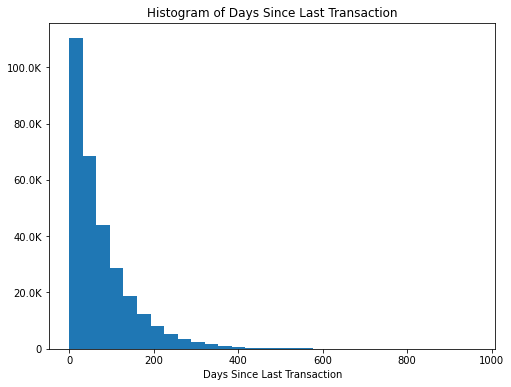

In [0]:
fig, ax = plt.subplots(figsize=(8,6))
hist(ax, last_monthly_purchase_base.select('days_since_last_txn'),bins= 30)
ax.set_xlabel("Days Since Last Transaction")
ax.set_title("Histogram of Days Since Last Transaction")
plt.show()

In [0]:
last_monthly_purchase_base = last_monthly_purchase_base.na.fill(value = -200)
days_since_last_txn = last_monthly_purchase_base.select("CLNT_NO","ME_DT","days_since_last_txn")
display(days_since_last_txn) # Download as csv

CLNT_NO ME_DT days_since_last_txn CS1112 2011-05-31 -200 CS1112 2011-06-30 15 CS1112 2011-07-31 46 CS1112 2011-08-31 12 CS1112 2011-09-30 42 CS1112 2011-10-31 29 CS1112 2011-11-30 59 CS1112 2011-12-31 90 CS1112 2012-01-31 121 CS1112 2012-02-29 150 CS1112 2012-03-31 181 CS1112 2012-04-30 22 CS1112 2012-05-31 53 CS1112 2012-06-30 6 CS1112 2012-07-31 28 CS1112 2012-08-31 59 CS1112 2012-09-30 14 CS1112 2012-10-31 45 CS1112 2012-11-30 75 CS1112 2012-12-31 16 CS1112 2013-01-31 47 CS1112 2013-02-28 75 CS1112 2013-03-31 30 CS1112 2013-04-30 60 CS1112 2013-05-31 91 CS1112 2013-06-30 121 CS1112 2013-07-31 30 CS1112 2013-08-31 61 CS1112 2013-09-30 91 CS1112 2013-10-31 122 CS1112 2013-11-30 17 CS1112 2013-12-31 48 CS1112 2014-01-31 79 CS1112 2014-02-28 107 CS1112 2014-03-31 138 CS1112 2014-04-30 1 CS1112 2014-05-31 32 CS1112 2014-06-30 62 CS1112 2014-07-31 15 CS1112 2014-08-31 46 CS1112 2014-09-30 76 CS1112 2014-10-31 107 CS1112 2014-11-30 137 CS1112 2014-12-31 27 CS1112 2015-01-31 17 CS1112 2015-02-28 45 CS1112 2015-03-31 76 CS1114 2011-05-31 -200 CS1114 2011-06-30 -200 CS1114 2011-07-31 17 CS1114 2011-08-31 7 CS1114 2011-09-30 11 CS1114 2011-10-31 42 CS1114 2011-11-30 72 CS1114 2011-12-31 103 CS1114 2012-01-31 134 CS1114 2012-02-29 163 CS1114 2012-03-31 194 CS1114 2012-04-30 224 CS1114 2012-05-31 18 CS1114 2012-06-30 48 CS1114 2012-07-31 3 CS1114 2012-08-31 34 CS1114 2012-09-30 64 CS1114 2012-10-31 95 CS1114 2012-11-30 125 CS1114 2012-12-31 156 CS1114 2013-01-31 14 CS1114 2013-02-28 42 CS1114 2013-03-31 73 CS1114 2013-04-30 103 CS1114 2013-05-31 4 CS1114 2013-06-30 34 CS1114 2013-07-31 65 CS1114 2013-08-31 96 CS1114 2013-09-30 19 CS1114 2013-10-31 50 CS1114 2013-11-30 80 CS1114 2013-12-31 2 CS1114 2014-01-31 6 CS1114 2014-02-28 24 CS1114 2014-03-31 55 CS1114 2014-04-30 85 CS1114 2014-05-31 116 CS1114 2014-06-30 146 CS1114 2014-07-31 177 CS1114 2014-08-31 0 CS1114 2014-09-30 29 CS1114 2014-10-31 60 CS1114 2014-11-30 90 CS1114 2014-12-31 0 CS1114 2015-01-31 31 CS1114 2015-02-28 16 CS1114 2015-03-31 47 CS1115 2011-05-31 -200 CS1115 2011-06-30 -200 CS1115 2011-07-31 -200 CS1115 2011-08-31 21 CS1115 2011-09-30 19 CS1115 2011-10-31 50 CS1115 2011-11-30 80 CS1115 2011-12-31 111 CS1115 2012-01-31 25 CS1115 2012-02-29 3 CS1115 2012-03-31 34 CS1115 2012-04-30 7 CS1115 2012-05-31 28 CS1115 2012-06-30 58 CS1115 2012-07-31 13 CS1115 2012-08-31 44 CS1115 2012-09-30 74 CS1115 2012-10-31 15 CS1115 2012-11-30 45 CS1115 2012-12-31 76 CS1115 2013-01-31 12 CS1115 2013-02-28 40 CS1115 2013-03-31 11 CS1115 2013-04-30 41 CS1115 2013-05-31 20 CS1115 2013-06-30 3 CS1115 2013-07-31 34 CS1115 2013-08-31 65 CS1115 2013-09-30 12 CS1115 2013-10-31 14 CS1115 2013-11-30 44 CS1115 2013-12-31 75 CS1115 2014-01-31 22 CS1115 2014-02-28 50 CS1115 2014-03-31 18 CS1115 2014-04-30 21 CS1115 2014-05-31 52 CS1115 2014-06-30 12 CS1115 2014-07-31 43 CS1115 2014-08-31 74 CS1115 2014-09-30 104 CS1115 2014-10-31 135 CS1115 2014-11-30 165 CS1115 2014-12-31 196 CS1115 2015-01-31 227 CS1115 2015-02-28 255 CS1115 2015-03-31 26 CS1116 2011-05-31 -200 CS1116 2011-06-30 3 CS1116 2011-07-31 10 CS1116 2011-08-31 12 CS1116 2011-09-30 17 CS1116 2011-10-31 48 CS1116 2011-11-30 78 CS1116 2011-12-31 109 CS1116 2012-01-31 140 CS1116 2012-02-29 15 CS1116 2012-03-31 46 CS1116 2012-04-30 25 CS1116 2012-05-31 56 CS1116 2012-06-30 86 CS1116 2012-07-31 117 CS1116 2012-08-31 7 CS1116 2012-09-30 37 CS1116 2012-10-31 68 CS1116 2012-11-30 98 CS1116 2012-12-31 129 CS1116 2013-01-31 27 CS1116 2013-02-28 55 CS1116 2013-03-31 86 CS1116 2013-04-30 116 CS1116 2013-05-31 147 CS1116 2013-06-30 177 CS1116 2013-07-31 208 CS1116 2013-08-31 239 CS1116 2013-09-30 269 CS1116 2013-10-31 300 CS1116 2013-11-30 330 CS1116 2013-12-31 361 CS1116 2014-01-31 392 CS1116 2014-02-28 21 CS1116 2014-03-31 10 CS1116 2014-04-30 40 CS1116 2014-05-31 1 CS1116 2014-06-30 22 CS1116 2014-07-31 53 CS1116 2014-08-31 6 CS1116 2014-09-30 36 CS1116 2014-10-31 67 CS1116 2014-11-30 97 CS1116 2014-12-31 128 CS1116 2015-01-31 159 CS1116 2015-02-28 1

* Since the histogram shows that it starts at 0, I replace the remaining NaN values with -200. Hence, substituting a negative number for NaN may not throw off the graph.